# Examen Parcial TEE: Mercado de Móviles del Perú
Por: Shalile Pinto y Enrique Sánchez

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.ticker as mticker
import locale
import warnings

# Suppress all warnings
warnings.simplefilter("ignore")
%matplotlib inline

In [2]:
df1=pd.read_csv('ingresos.csv', sep=";")
df1.head()

,compania,linea_de_producto,anho,ingresos_soles
0,Claro,publico,2013,10690680
1,Claro,larga_distancia,2013,12285877
2,Claro,otros,2013,85336817
3,Claro,linea_fija,2013,107044890
4,Claro,cabletv,2013,119579263


In [3]:
df1.rename(columns={"anho": 'año'}, inplace=True)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   compania           1949 non-null   object
 1   linea_de_producto  1949 non-null   object
 2   año                1949 non-null   int64 
 3   ingresos_soles     1949 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ KB


In [5]:
df2=pd.read_csv('moviles.csv', sep=";")
df2.head()

,compania,tipo_de_plan,mes,año,numero_de_lineas
0,Claro,control,1,2013,6
1,Claro,control,1,2013,8
2,Claro,control,1,2013,9
3,Claro,control,1,2013,11
4,Claro,control,1,2013,15


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33857 entries, 0 to 33856
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   compania          33857 non-null  object
 1   tipo_de_plan      33857 non-null  object
 2   mes               33857 non-null  int64 
 3   año               33857 non-null  int64 
 4   numero_de_lineas  33857 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.3+ MB


In [7]:
df2=pd.DataFrame(df2.groupby(['compania', 'tipo_de_plan', 'mes', 'año'])['numero_de_lineas'].sum())
df2.reset_index(inplace=True)
df2.head()

,compania,tipo_de_plan,mes,año,numero_de_lineas
0,Bitel,control,1,2015,79504
1,Bitel,control,1,2016,166286
2,Bitel,control,1,2017,259098
3,Bitel,control,1,2018,631801
4,Bitel,control,1,2019,1687759


## Ingresos del Mercado Total

### 1. ¿Cuánto factura anualmente el mercado de telecomunicaciones en el Perú (todos las líneas de negocio) y ¿Cuál es la tasa de crecimiento del mercado total del 2013 al 2021?

In [8]:
#Agrupamos todos los ingresos por año 
df3 = pd.DataFrame(df1.groupby(["año"])["ingresos_soles"].sum())
df3.reset_index(inplace=True)
df3

,año,ingresos_soles
0,2013,15245489131
1,2014,16633430993
2,2015,17689307310
3,2016,18181457364
4,2017,18516442418
5,2018,18824293950
6,2019,19509399106
7,2020,17405010796
8,2021,20430665240


In [9]:
#Creamos ingresos en millones de soles y la tasa de crecimiento anual
df3["ingresos_soles_m"] = df3["ingresos_soles"]/1000000
df3["crecimiento_anual_mt"] = df3["ingresos_soles"].pct_change()*100
df3

,año,ingresos_soles,ingresos_soles_m,crecimiento_anual_mt
0,2013,15245489131,15245.489131,NaN
1,2014,16633430993,16633.430993,9.103951
2,2015,17689307310,17689.307310,6.347917
3,2016,18181457364,18181.457364,2.782190
4,2017,18516442418,18516.442418,1.842454
5,2018,18824293950,18824.293950,1.662585
6,2019,19509399106,19509.399106,3.639473
7,2020,17405010796,17405.010796,-10.786536
8,2021,20430665240,20430.665240,17.383813


In [10]:
#Creamos una función para darle formato de comas, así la tabla es más entendible también
def format_with_commas(x):
    return "{:,.0f}".format(x)

locale.setlocale(locale.LC_ALL, '')

# Aplicamos el formato a las columnas
columns_to_format = ["ingresos_soles"]
df3[columns_to_format] = df3[columns_to_format].apply(lambda x: x.map(format_with_commas))

df3

,año,ingresos_soles,ingresos_soles_m,crecimiento_anual_mt
0,2013,"15,245,489,131",15245.489131,NaN
1,2014,"16,633,430,993",16633.430993,9.103951
2,2015,"17,689,307,310",17689.307310,6.347917
3,2016,"18,181,457,364",18181.457364,2.782190
4,2017,"18,516,442,418",18516.442418,1.842454
5,2018,"18,824,293,950",18824.293950,1.662585
6,2019,"19,509,399,106",19509.399106,3.639473
7,2020,"17,405,010,796",17405.010796,-10.786536
8,2021,"20,430,665,240",20430.665240,17.383813


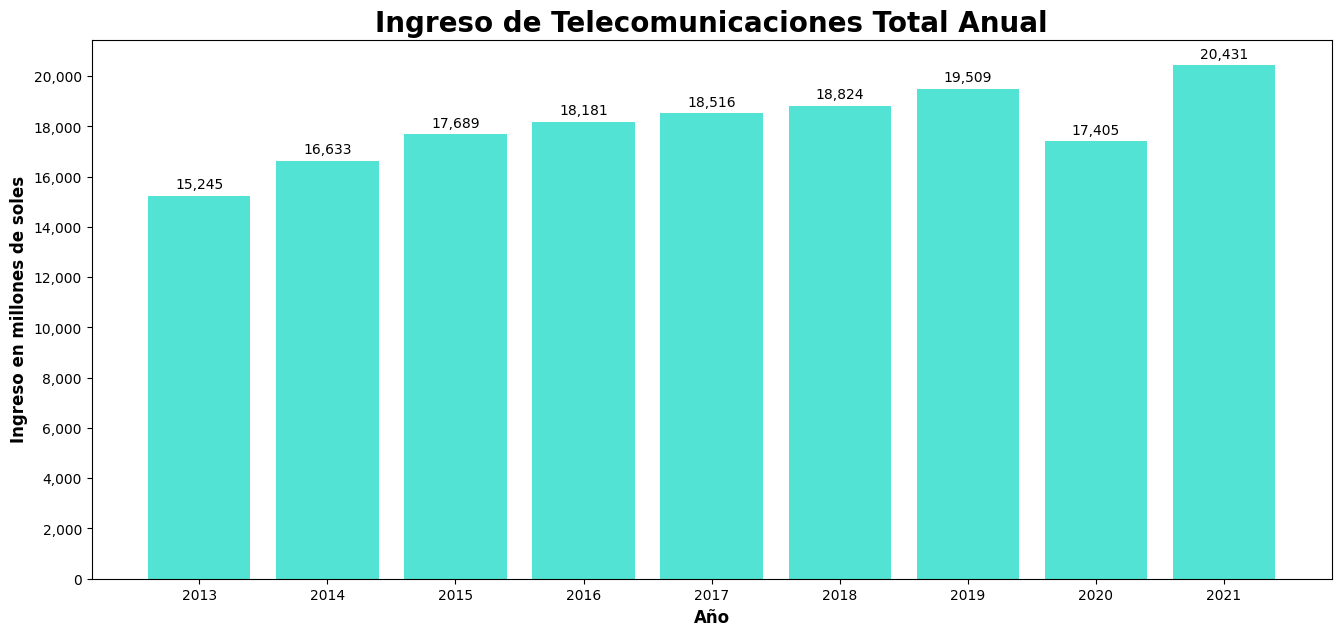

In [11]:
#Graficamos
plt.figure(figsize=(16,7)) 
bars = plt.bar(df3.año, df3.ingresos_soles_m, color="turquoise", alpha=0.9)

x_ticks = [i for i in range(2013,2022)]
## Manipulando el eje X
plt.xlabel('Año', fontweight = "bold", fontsize = 12)
plt.xticks(x_ticks) 

## Manipulando el eje Y
plt.ylabel("Ingreso en millones de soles", fontweight = "bold", fontsize = 12)

y_ticks = [i for i in range(0,22000,2000)]
plt.yticks(y_ticks)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

#Anotaciones para las columnas:
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:,.0f}', 
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=10)
    
#Título
plt.title("Ingreso de Telecomunicaciones Total Anual", fontsize=20, fontweight = "bold")
plt.show()

Se observa que la tendencia de los ingresos en millones de soles fue ascendente excepto en el año 2020 donde a causa de la pandemia decrece; sin embargo, vuelve a su trayectoria.

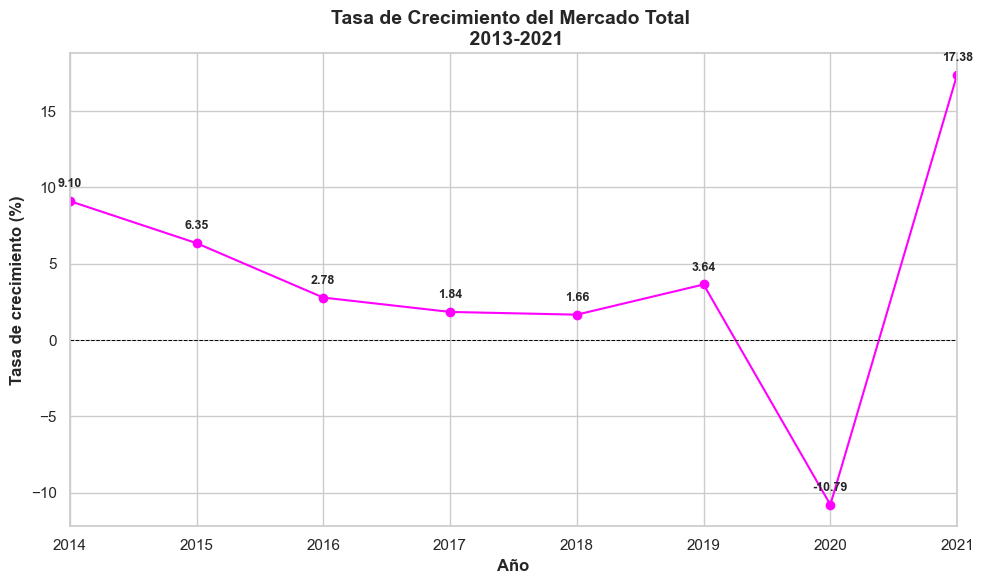

In [12]:
#Graficamos el crecimiento

plt.figure(figsize=(10, 6))
sb.set_theme(style="whitegrid")  
plt.plot(df3.año[1:], df3.crecimiento_anual_mt[1:], color = "magenta", marker = "o")
plt.title("Tasa de Crecimiento del Mercado Total \n 2013-2021", fontsize = 14, fontweight = "bold")
plt.xlabel("Año", fontweight = "bold")
plt.ylabel("Tasa de crecimiento (%)", fontweight = "bold")
plt.xlim(min(df3['año'][1:]), max(df3['año']))
x_ticks = [i for i in range(2014,2022)]
plt.axhline(0, color='black', linewidth=0.7, linestyle='--')
plt.xticks(x_ticks)
for i, txt in enumerate(df3.crecimiento_anual_mt[1:]):
    plt.annotate(f'{txt:.2f}', (df3.año[i + 1], df3.crecimiento_anual_mt[i + 1]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, fontweight = "bold")
plt.grid(True)
plt.tight_layout()
plt.show()

La serie presenta un crecimiento en los ingresos cada vez menor a través del tiempo. En 2020, hubo una caída significativa, pero la recuperación vino dada por un efecto rebote y la reactivación económica.

### 2. Replicar el mismo gráfico solo para Claro

In [13]:
#Agrupamos ingresos en soles por año y compañía
df4 = df1.groupby(["año","compania"])["ingresos_soles"].sum().reset_index()
df4["ingresos_soles_m"] = df4["ingresos_soles"]/1000000
df4 = df4[df4['compania'] == "Claro"]

locale.setlocale(locale.LC_ALL, '')

columns_to_format = ["ingresos_soles"]
df4[columns_to_format] = df4[columns_to_format].apply(lambda x: x.map(format_with_commas))

df4.head()

,año,compania,ingresos_soles,ingresos_soles_m
0,2013,Claro,"4,922,299,998",4922.299998
6,2014,Claro,"5,435,843,002",5435.843002
12,2015,Claro,"5,456,522,486",5456.522486
18,2016,Claro,"5,446,446,418",5446.446418
24,2017,Claro,"5,728,623,801",5728.623801


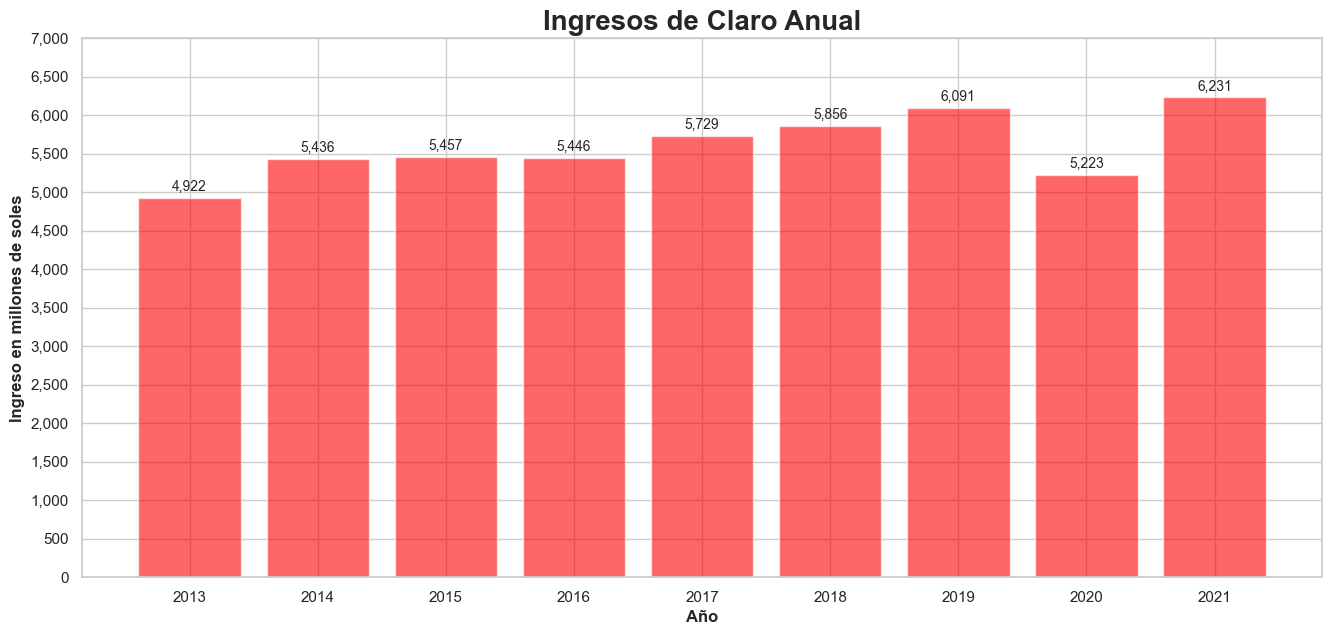

In [14]:
#Graficamos
plt.figure(figsize=(16,7)) 
bars = plt.bar(df4.año, df4.ingresos_soles_m, color="red", alpha=0.6)

x_ticks = [i for i in range(2013,2022)]
## Manipulando el eje X
plt.xlabel('Año', fontweight = "bold", fontsize = 12)
plt.xticks(x_ticks) 

## Manipulando el eje Y
plt.ylabel("Ingreso en millones de soles", fontweight = "bold", fontsize = 12)

y_ticks = [i for i in range(0,7500,500)]
plt.yticks(y_ticks)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

#Anotaciones para las columnas:
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:,.0f}', 
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=10)
    
#Título
plt.title("Ingresos de Claro Anual", fontsize=20, fontweight = "bold")
plt.show()

La compañía de Claro ha seguido el mismo patrón que el mercado total con un crecimiento progresivo. 

In [15]:
#Calculamos tasa de crecimiento anual para Claro
df4["crecimiento_anual_cl"] = df4["ingresos_soles_m"].pct_change()*100
df4a = df4.reset_index(drop= True)
df4a

,año,compania,ingresos_soles,ingresos_soles_m,crecimiento_anual_cl
0,2013,Claro,"4,922,299,998",4922.299998,NaN
1,2014,Claro,"5,435,843,002",5435.843002,10.432989
2,2015,Claro,"5,456,522,486",5456.522486,0.380428
3,2016,Claro,"5,446,446,418",5446.446418,-0.184661
4,2017,Claro,"5,728,623,801",5728.623801,5.180945
5,2018,Claro,"5,856,223,769",5856.223769,2.227410
6,2019,Claro,"6,090,842,707",6090.842707,4.006318
7,2020,Claro,"5,222,505,451",5222.505451,-14.256439
8,2021,Claro,"6,231,093,740",6231.093740,19.312345


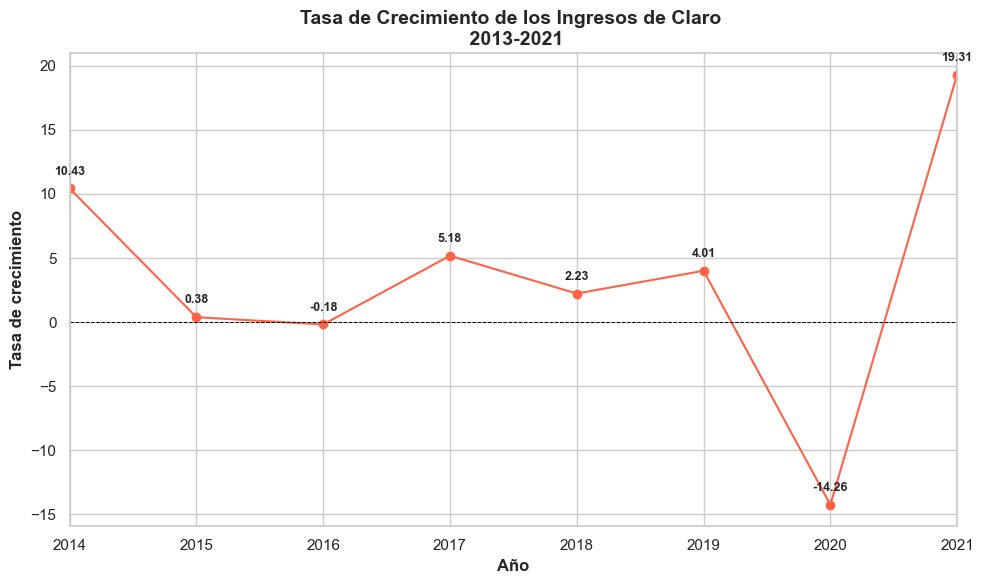

In [16]:
#Graficamos el crecimiento

plt.figure(figsize=(10, 6))
sb.set_theme(style="whitegrid")  
plt.plot(df4a.año[1:], df4.crecimiento_anual_cl[1:], color = "tomato", marker = "o")
plt.title("Tasa de Crecimiento de los Ingresos de Claro \n 2013-2021", fontsize = 14, fontweight = "bold")
plt.xlabel("Año", fontweight = "bold")
plt.ylabel("Tasa de crecimiento", fontweight = "bold")
plt.xlim(min(df4a['año'][1:]), max(df4a['año']))
x_ticks = [i for i in range(2014,2022)]
plt.axhline(0, color='black', linewidth=0.7, linestyle='--')
plt.xticks(x_ticks)
for i, txt in enumerate(df4a.crecimiento_anual_cl[1:]):
    plt.annotate(f'{txt:.2f}', (df4a.año[i + 1], df4a.crecimiento_anual_cl[i + 1]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, fontweight = "bold")
plt.grid(True)
plt.tight_layout()
plt.show()

A partir del gráfico vemos que los ingresos percibidos por la compañía Claro se han reducido en la primera etapa, seguido por un leve increcento que se vio perjudicado en 2020 de manera notoria. En lo sucesivo, se pudo reestablecer, superando incluso su trayectoria. 

### 3. ¿Cual es el % de ingresos del mercado de los 6 competidores tanto en 2013 como en 2021? 

In [17]:
#Agrupamos ingresos en soles por año y compañía
df5 = df1.groupby(["año","compania"])["ingresos_soles"].sum().reset_index()
df5["ingresos_soles_m"] = df5["ingresos_soles"]/1000000

In [18]:
#Unimos bases 
df5 = pd.merge(df5, df3, on="año", how="right")
df5.head()

,año,compania,ingresos_soles_x,ingresos_soles_m_x,ingresos_soles_y,ingresos_soles_m_y,crecimiento_anual_mt
0,2013,Claro,4922299998,4922.299998,"15,245,489,131",15245.489131,NaN
1,2013,DirectTV,190496464,190.496464,"15,245,489,131",15245.489131,NaN
2,2013,Entel,824485891,824.485891,"15,245,489,131",15245.489131,NaN
3,2013,Movistar,8829692000,8829.692000,"15,245,489,131",15245.489131,NaN
4,2013,Otros,478514778,478.514778,"15,245,489,131",15245.489131,NaN


In [19]:
#Renombramos variables para hacerlas entendibles
df5.rename(columns={"ingresos_soles_x": 'ingresos_soles',"ingresos_soles_y": "ingresos_soles_totales", "ingresos_soles_m_x": "ingresos_soles_m","ingresos_soles_m_y": "ingresos_soles_totales_m" }, inplace=True)
#Les damos el formato de comas
columns_to_format = ["ingresos_soles"]
df5[columns_to_format] = df5[columns_to_format].apply(lambda x: x.map(format_with_commas))
#Crecimiento anual ya no es útil para esta pregunta así que podemos eliminarla
df5.drop("crecimiento_anual_mt", axis=1, inplace=True)
df5.head()

,año,compania,ingresos_soles,ingresos_soles_m,ingresos_soles_totales,ingresos_soles_totales_m
0,2013,Claro,"4,922,299,998",4922.299998,"15,245,489,131",15245.489131
1,2013,DirectTV,"190,496,464",190.496464,"15,245,489,131",15245.489131
2,2013,Entel,"824,485,891",824.485891,"15,245,489,131",15245.489131
3,2013,Movistar,"8,829,692,000",8829.692000,"15,245,489,131",15245.489131
4,2013,Otros,"478,514,778",478.514778,"15,245,489,131",15245.489131


In [20]:
#Calculamos el ingreso en soles porcentual por compañía
df5["ingresos_soles_por"] = df5["ingresos_soles_m"]/df5["ingresos_soles_totales_m"]*100

In [21]:
#Limpiamos la base
columns_to_drop = ["ingresos_soles", "ingresos_soles_m","ingresos_soles_totales","ingresos_soles_totales_m"]
df5.drop(columns_to_drop, axis=1, inplace=True)
df5.head()

,año,compania,ingresos_soles_por
0,2013,Claro,32.286927
1,2013,DirectTV,1.249527
2,2013,Entel,5.408065
3,2013,Movistar,57.916751
4,2013,Otros,3.138730


In [22]:
#Reorganizamos la data
df5 = df5.pivot(index = "año", columns = "compania", values = "ingresos_soles_por")
df5.fillna(0, inplace=True)
df5.head()


compania,Bitel,Claro,DirectTV,Entel,Movistar,Otros
año,,,,,,
2013,0.000000,32.286927,1.249527,5.408065,57.916751,3.138730
2014,0.219244,32.680227,1.455264,4.603720,57.311249,3.730296
2015,1.432259,30.846445,1.409209,6.523466,55.289582,4.499039
2016,2.741754,29.956050,1.487059,9.527802,51.551170,4.736165
2017,4.680332,30.938037,1.596268,12.303838,45.585879,4.895647


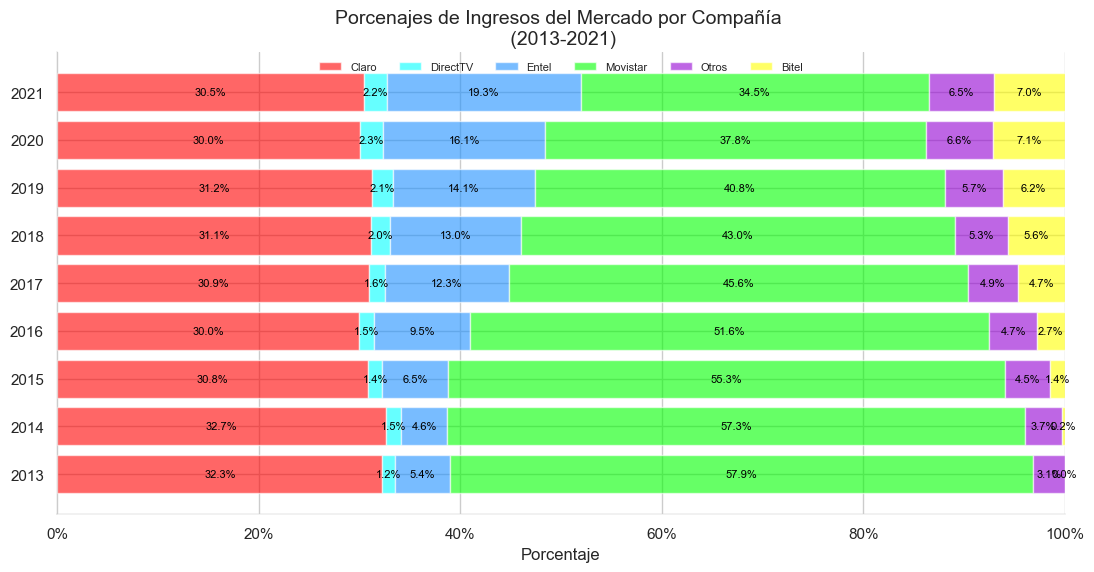

In [23]:
plt.figure(figsize=(13, 6))
plt.rcParams["font.size"] = 8

#Definimos los colores para las compañías
colors = ["red", "cyan", "dodgerblue", "lime", "darkviolet", "yellow"]

# iniciamos lefts con 0
lefts = [0] * len(df5)

columns = ["Claro", "DirectTV", "Entel", "Movistar", "Otros", "Bitel"]

for col, color in zip(columns, colors):
    plt.barh(df5.index, df5[col], left=lefts, label=col, color=color, alpha = 0.6)
    for year, value in zip(df5.index, df5[col]):
        left = lefts[year - 2013]
        plt.text(left + value / 2, year, f"{value:.1f}%", ha="center", va="center", fontsize=8, color="black")
        lefts[year - 2013] += value

plt.title("Porcenajes de Ingresos del Mercado por Compañía \n (2013-2021)", fontsize=14)
plt.legend(frameon=False, loc="upper center", ncol=6, fontsize=8)
plt.xlabel("Porcentaje")
yticks1 = [i for i in range(2013, 2022)]
plt.yticks(yticks1)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0f}%"))

# Damos formato a los bordes y al fondo
plt.gca().spines["top"].set_alpha(0.0)
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)
plt.gca().spines["left"].set_alpha(0.3)
plt.show()

Notamos la reducción significativa en el pasar de los años por parte de Movistar y el crecimiento constante por parte de Entel, Bitel y Otros. También vemos que Claro ha logrado mantener su posición, conservando casi una tercera parte de los ingresos del mercado total.

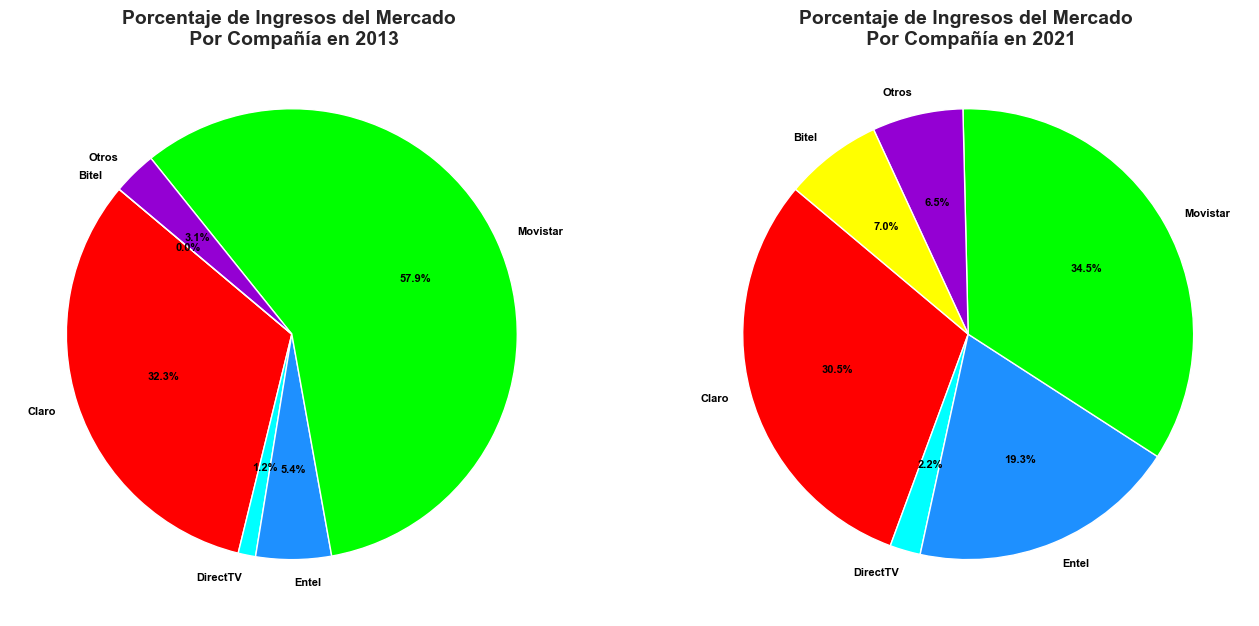

In [24]:
# Filtramos el DF para 2013 y 2021
df_2013 = df5.loc[2013]
df_2021 = df5.loc[2021]

# Extraemos los valores para las compañías
companies = ["Claro", "DirectTV", "Entel", "Movistar", "Otros", "Bitel"]
values_2013 = df_2013[companies].values
values_2021 = df_2021[companies].values

# Fijamos los colores
colors = ["red", "cyan", "dodgerblue", "lime", "darkviolet", "yellow"]

# Creamos los subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico 2013
ax1.pie(values_2013, labels=companies, colors=colors, autopct='%1.1f%%', startangle=140)
ax1.set_title("Porcentaje de Ingresos del Mercado \n Por Compañía en 2013", fontsize = 14, fontweight = "bold")

# Gráfico 2021
ax2.pie(values_2021, labels=companies, colors=colors, autopct='%1.1f%%', startangle=140)
ax2.set_title("Porcentaje de Ingresos del Mercado \n Por Compañía en 2021", fontsize = 14, fontweight = "bold")

for ax in [ax1, ax2]:
    for text in ax.texts:
        text.set_fontweight('bold')
        text.set_color('black')
        text.set_size(8)

plt.show()



En este gráfico se puede apreciar la ligera caída de Claro en la posición de mercado, una reducción casi del 50% del market share de Movistar debido a las compañías que se incorporaron al mercado como Bitel.

### 4. ¿Cuánto es el % de la facturación para cada linea de producto para el mercado total? ¿Cómo evoluciona entre 2013 y 2021? 

In [25]:
#Agrupamos los ingresos en soles por año y línea de producto
df6 = df1.groupby(["año", "linea_de_producto"])["ingresos_soles"].sum().reset_index()
df6["ingresos_soles_m"] = df6["ingresos_soles"]/1000000

In [26]:
#Juntamos bases 
df6 = pd.merge(df6, df3, on="año", how="right")
df6.head()

,año,linea_de_producto,ingresos_soles_x,ingresos_soles_m_x,ingresos_soles_y,ingresos_soles_m_y,crecimiento_anual_mt
0,2013,cabletv,1015124752,1015.124752,"15,245,489,131",15245.489131,NaN
1,2013,data,746966907,746.966907,"15,245,489,131",15245.489131,NaN
2,2013,equipos,1281587915,1281.587915,"15,245,489,131",15245.489131,NaN
3,2013,interconexion,807141776,807.141776,"15,245,489,131",15245.489131,NaN
4,2013,internet,1582650947,1582.650947,"15,245,489,131",15245.489131,NaN


In [27]:
#Renombramos variables para hacerlas entendibles
df6.rename(columns={"ingresos_soles_x": 'ingresos_soles',"ingresos_soles_y": "ingresos_soles_totales", "ingresos_soles_m_x": "ingresos_soles_m","ingresos_soles_m_y": "ingresos_soles_totales_m" }, inplace=True)
#Les damos el formato de comas
columns_to_format = ["ingresos_soles"]
df6[columns_to_format] = df6[columns_to_format].apply(lambda x: x.map(format_with_commas))
#Crecimiento anual ya no es útil para esta pregunta así que podemos eliminarla
df6.drop("crecimiento_anual_mt", axis=1, inplace=True)
df6.head()

,año,linea_de_producto,ingresos_soles,ingresos_soles_m,ingresos_soles_totales,ingresos_soles_totales_m
0,2013,cabletv,"1,015,124,752",1015.124752,"15,245,489,131",15245.489131
1,2013,data,"746,966,907",746.966907,"15,245,489,131",15245.489131
2,2013,equipos,"1,281,587,915",1281.587915,"15,245,489,131",15245.489131
3,2013,interconexion,"807,141,776",807.141776,"15,245,489,131",15245.489131
4,2013,internet,"1,582,650,947",1582.650947,"15,245,489,131",15245.489131


In [28]:
#Creamos ingresos porcentuales 
df6["ingresos_soles_por"] = df6["ingresos_soles_m"]/df6["ingresos_soles_totales_m"]*100

In [29]:
#Limpiamos la base
columns_to_drop = ["ingresos_soles", "ingresos_soles_m","ingresos_soles_totales","ingresos_soles_totales_m"]
df6.drop(columns_to_drop, axis=1, inplace=True)
df6.head()

,año,linea_de_producto,ingresos_soles_por
0,2013,cabletv,6.658525
1,2013,data,4.899593
2,2013,equipos,8.406342
3,2013,interconexion,5.294299
4,2013,internet,10.381110


In [30]:
#Reorganizamos la data
df6 = df6.pivot(index = "año", columns = "linea_de_producto", values = "ingresos_soles_por")
df6.fillna(0, inplace=True)
df6.head()

linea_de_producto,cabletv,data,equipos,interconexion,internet,larga_distancia,linea_fija,movil,otros,publico
año,,,,,,,,,,
2013,6.658525,4.899593,8.406342,5.294299,10.381110,1.705094,6.536165,50.677327,2.573584,2.867961
2014,6.947242,5.089530,8.703360,5.242224,10.992300,1.491729,5.612722,50.770547,3.064949,2.085397
2015,8.204955,5.784495,9.605777,5.133272,10.837671,1.309381,4.494681,51.851345,1.317612,1.460812
2016,8.702193,6.086095,10.346474,7.273882,10.662869,1.021439,4.298508,48.930811,1.588550,1.089179
2017,9.044618,5.114478,12.862073,9.522041,11.057337,0.610244,3.854215,43.289118,4.013423,0.632452


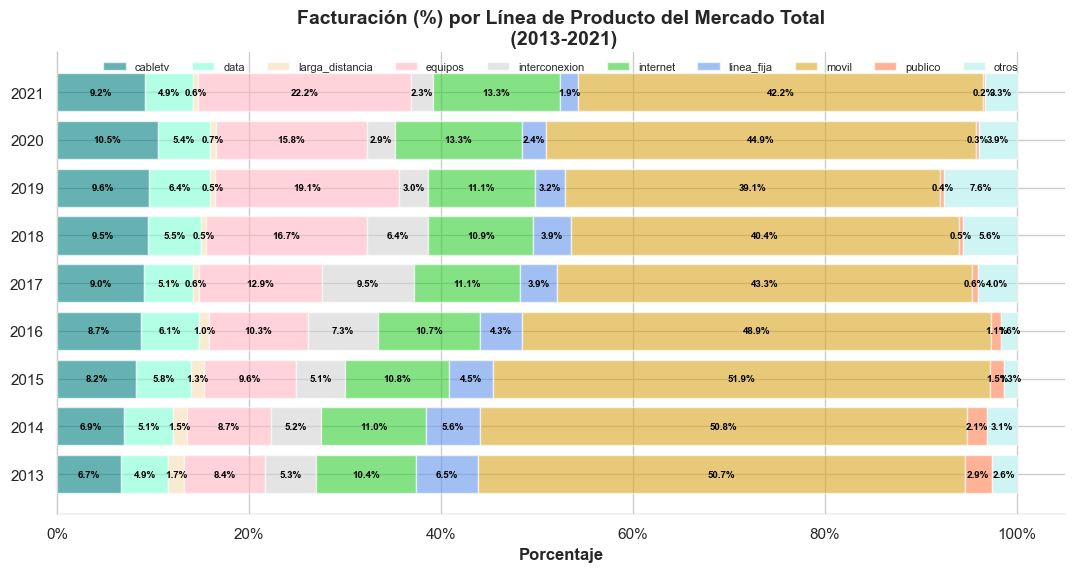

In [31]:
plt.figure(figsize=(13, 6))
plt.rcParams["font.size"] = 8


colors = ["teal","aquamarine","wheat", "lightpink","lightgrey","limegreen","cornflowerblue","goldenrod","coral","paleturquoise"]


lefts = [0] * len(df6)

columns = ["cabletv","data","larga_distancia","equipos","interconexion","internet","linea_fija","movil","publico","otros"]

for col, color in zip(columns, colors):
    plt.barh(df6.index, df6[col], left=lefts, label=col, color=color, alpha = 0.6)
    for year, value in zip(df6.index, df6[col]):
        left = lefts[year - 2013]
        plt.text(left + value / 2, year, f"{value:.1f}%", ha="center", va="center", fontsize=7, color="black", fontweight = "bold")
        lefts[year - 2013] += value

plt.title("Facturación (%) por Línea de Producto del Mercado Total\n (2013-2021)", fontsize=14, fontweight = "bold")
plt.legend(frameon=False, loc="upper center", ncol=10, fontsize=8)
plt.xlabel("Porcentaje", fontweight = "bold")
yticks1 = [i for i in range(2013, 2022)]
plt.yticks(yticks1)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0f}%"))

plt.gca().spines["top"].set_alpha(0.0)
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)
plt.gca().spines["left"].set_alpha(0.3)
plt.show()

El gráfico presenta claramente que los moviles son la principal fuente de ingresos para las compañías. Es notorio también que los equipos han ganado posición dentro de las mejores lineas de producto, al igual que cabletv e internet. Por otro lado, las llamadas de larga distancia, cada vez van perdiendo más valor y se vuelven al parecer obsoletas, con las miras a las nuevas facilidades de conexión por medio de redes sociales.

### 5. ¿Cuánto es el % de la facturación para cada linea de producto para Claro? ¿Cómo evoluciona entre 2013 y 2021?

In [32]:
#Agrupamos ingresos en soles por año, compañía y línea de producto
df7 = df1.groupby(["año", "compania","linea_de_producto"])["ingresos_soles"].sum().reset_index()
df7["ingresos_soles_m"] = df7["ingresos_soles"]/1000000
df7.head()

,año,compania,linea_de_producto,ingresos_soles,ingresos_soles_m
0,2013,Claro,cabletv,119579263,119.579263
1,2013,Claro,data,129783150,129.783150
2,2013,Claro,equipos,602707188,602.707188
3,2013,Claro,interconexion,451196666,451.196666
4,2013,Claro,internet,171809964,171.809964


In [33]:
#Agrupamos ingresos en soles por año y compañía
df8 = df1.groupby(["año","compania"])["ingresos_soles"].sum().reset_index()
df8["ingresos_soles_m"] = df8["ingresos_soles"]/1000000
df8.head()

,año,compania,ingresos_soles,ingresos_soles_m
0,2013,Claro,4922299998,4922.299998
1,2013,DirectTV,190496464,190.496464
2,2013,Entel,824485891,824.485891
3,2013,Movistar,8829692000,8829.692000
4,2013,Otros,478514778,478.514778


In [34]:
#Juntamos las bases
df7 = pd.merge(df7, df8, on=["año","compania"], how="right")
df7.head()

,año,compania,linea_de_producto,ingresos_soles_x,ingresos_soles_m_x,ingresos_soles_y,ingresos_soles_m_y
0,2013,Claro,cabletv,119579263,119.579263,4922299998,4922.299998
1,2013,Claro,data,129783150,129.783150,4922299998,4922.299998
2,2013,Claro,equipos,602707188,602.707188,4922299998,4922.299998
3,2013,Claro,interconexion,451196666,451.196666,4922299998,4922.299998
4,2013,Claro,internet,171809964,171.809964,4922299998,4922.299998


In [35]:
#Renombramos variables para hacerlas entendibles
df7.rename(columns={"ingresos_soles_x": 'ingresos_soles',"ingresos_soles_y": "ingresos_soles_totales", "ingresos_soles_m_x": "ingresos_soles_m","ingresos_soles_m_y": "ingresos_soles_totales_m" }, inplace=True)
#Les damos el formato de comas
columns_to_format = ["ingresos_soles", "ingresos_soles_totales"]
df7[columns_to_format] = df7[columns_to_format].apply(lambda x: x.map(format_with_commas))
df7.head()

,año,compania,linea_de_producto,ingresos_soles,ingresos_soles_m,ingresos_soles_totales,ingresos_soles_totales_m
0,2013,Claro,cabletv,"119,579,263",119.579263,"4,922,299,998",4922.299998
1,2013,Claro,data,"129,783,150",129.783150,"4,922,299,998",4922.299998
2,2013,Claro,equipos,"602,707,188",602.707188,"4,922,299,998",4922.299998
3,2013,Claro,interconexion,"451,196,666",451.196666,"4,922,299,998",4922.299998
4,2013,Claro,internet,"171,809,964",171.809964,"4,922,299,998",4922.299998


In [36]:
#Filtramos la base solo para Claro
df7 = df7[df7["compania"] == "Claro"]
df7["ingresos_soles_por"] = df7["ingresos_soles_m"]/df7["ingresos_soles_totales_m"]*100

In [37]:
#Limpiamos la base
columns_to_drop = ["ingresos_soles", "ingresos_soles_m","ingresos_soles_totales","ingresos_soles_totales_m"]
df7.drop(columns_to_drop, axis=1, inplace=True)
df7.head()

,año,compania,linea_de_producto,ingresos_soles_por
0,2013,Claro,cabletv,2.429337
1,2013,Claro,data,2.636636
2,2013,Claro,equipos,12.244422
3,2013,Claro,interconexion,9.166379
4,2013,Claro,internet,3.490441


In [38]:
#Reorganizamos la data
df7 = df7.pivot(index = "año", columns = "linea_de_producto", values = "ingresos_soles_por")
df7.fillna(0, inplace=True)
df7.head()

linea_de_producto,cabletv,data,equipos,interconexion,internet,larga_distancia,linea_fija,movil,otros,publico
año,,,,,,,,,,
2013,2.429337,2.636636,12.244422,9.166379,3.490441,0.249596,2.174693,65.657630,1.733678,0.217189
2014,2.769325,2.699053,12.742062,8.589913,4.440697,0.230625,2.191789,64.698211,1.475545,0.162780
2015,3.051678,3.037065,14.823661,6.691073,5.228680,0.211106,2.225721,63.119924,1.447838,0.163254
2016,3.397787,2.874167,16.214541,7.571705,6.128111,0.158921,2.404508,58.533776,2.581056,0.135430
2017,3.214508,2.818118,13.067608,8.940247,6.122180,0.110035,2.313150,55.908929,7.439145,0.066080


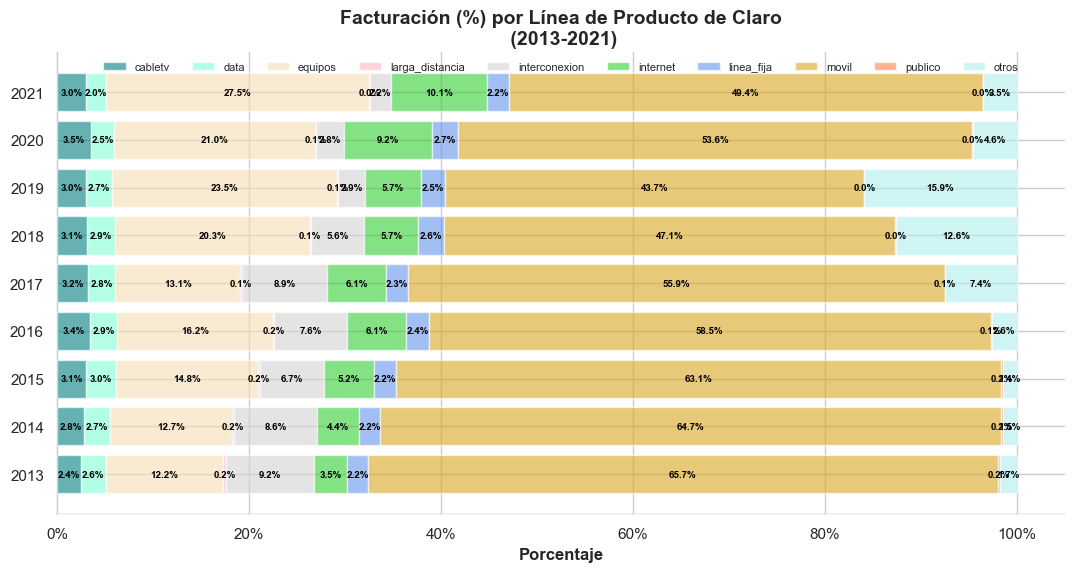

In [39]:
plt.figure(figsize=(13, 6))
plt.rcParams["font.size"] = 8

# Define custom colors for each company
colors = ["teal","aquamarine","wheat", "lightpink","lightgrey","limegreen","cornflowerblue","goldenrod","coral","paleturquoise"]

# Initialize lefts with zeros
lefts = [0] * len(df7)

columns = ["cabletv","data","equipos","larga_distancia","interconexion","internet","linea_fija","movil","publico","otros"]

for col, color in zip(columns, colors):
    plt.barh(df7.index, df7[col], left=lefts, label=col, color=color, alpha = 0.6)
    for year, value in zip(df7.index, df7[col]):
        left = lefts[year - 2013]
        plt.text(left + value / 2, year, f"{value:.1f}%", ha="center", va="center", fontsize=7, color="black", fontweight = "bold")
        lefts[year - 2013] += value

plt.title("Facturación (%) por Línea de Producto de Claro\n (2013-2021)", fontsize=14, fontweight = "bold")
plt.legend(frameon=False, loc="upper center", ncol=10, fontsize=8)
plt.xlabel("Porcentaje", fontweight = "bold")
yticks1 = [i for i in range(2013, 2022)]
plt.yticks(yticks1)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0f}%"))

# Remove borders and set grid
plt.gca().spines["top"].set_alpha(0.0)
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)
plt.gca().spines["left"].set_alpha(0.3)
plt.show()

Al igual que en el mercado total, Claro presenta casi el mismo patrón de facturación porcentual. Aunque salta a la vista los cambios porcentuales de la línea de producto movil, que parece ser reemplazada por el incremento del sector internet y equipos

## Mercado Movil

### 1. Utilizando la data de la pregunta anterior, ¿qué porcentaje del mercado por ingreso, del producto móviles, tenía cada empresa en el 2013? ¿Cuánto tienen en el 2021? 

In [40]:
#Agrupamos los ingresos en soles por año, compañia y línea de producto
df9 = df1.groupby(["año", "compania","linea_de_producto"])["ingresos_soles"].sum().reset_index()
df9["ingresos_soles_m"] = df9["ingresos_soles"]/1000000
df9.head()

,año,compania,linea_de_producto,ingresos_soles,ingresos_soles_m
0,2013,Claro,cabletv,119579263,119.579263
1,2013,Claro,data,129783150,129.783150
2,2013,Claro,equipos,602707188,602.707188
3,2013,Claro,interconexion,451196666,451.196666
4,2013,Claro,internet,171809964,171.809964


In [41]:
#Reorganizamos la data
df9 = df9.pivot(index = "año", columns = ["compania","linea_de_producto"], values = "ingresos_soles_m")
df9.fillna(0, inplace=True)
df9.head()

compania                Claro                                        \
linea_de_producto     cabletv        data     equipos interconexion   
año                                                                   
2013               119.579263  129.783150  602.707188    451.196666   
2014               150.536141  146.716289  692.638499    466.934200   
2015               166.515522  165.718117  808.856406    365.099892   
2016               185.058624  156.539940  883.116261    412.388880   
2017               184.147076  161.439382  748.594095    512.153123   

compania                                                                \
linea_de_producto    internet larga_distancia  linea_fija        movil   
año                                                                      
2013               171.809964       12.285877  107.044890  3231.865503   
2014               241.389343       12.536394  119.142207  3516.893188   
2015               285.304118       11.519043  121.446970  3444.152820   
2016               333.764289        8.655521  130.960220  3188.010738   
2017               350.716688        6.303504  132.511671  3202.812199   

compania                                  ...      Bitel              \
linea_de_producto       otros    publico  ...       data     equipos   
año                                       ...                          
2013                85.336817  10.690680  ...   0.000000    0.000000   
2014                80.208287   8.848454  ...   0.098126   18.355717   
2015                79.001615   8.907983  ...   3.288067   75.004480   
2016               140.575842   7.376103  ...  15.182463   81.912100   
2017               426.160604   3.785459  ...  21.750843  143.032411   

compania                                     DirectTV     Entel     Bitel  \
linea_de_producto interconexion       movil     otros      data  internet   
año                                                                         
2013                   0.000000    0.000000  0.000000  0.000000  0.000000   
2014                   3.314126   14.699910  0.000000  0.000000  0.000000   
2015                  35.907020  139.157070  1.580129  0.054924  0.000000   
2016                 135.198497  262.032521  0.000000  1.980554  3.737946   
2017                 229.403144  462.604981  6.182656  3.574251  8.637510   

compania                                                
linea_de_producto larga_distancia linea_fija     otros  
año                                                     
2013                     0.000000   0.000000  0.000000  
2014                     0.000000   0.000000  0.000000  
2015                     0.000000   0.000000  0.000000  
2016                     0.401237   0.026080  0.000000  
2017                     0.822069   0.300041  0.080001  

[5 rows x 49 columns]

In [42]:
#Filtramos la data solo para movil
df10 = df9.loc[:, (slice(None), ["movil"])]
df10.head()

compania,Claro,Entel,Movistar,Otros,Bitel
linea_de_producto,movil,movil,movil,movil,movil
año,,,,,
2013,3231.865503,608.200298,3876.234000,9.706606,0.000000
2014,3516.893188,542.685048,4357.909000,12.696822,14.699910
2015,3444.152820,825.536543,4719.637760,43.659543,139.157070
2016,3188.010738,1199.205918,4207.799063,39.286289,262.032521
2017,3202.812199,1432.586927,2886.245000,31.355464,462.604981


In [43]:
#Creamos los ingresos totales del mercado
df10["Mercado","ingresos_totales"] = df10.sum(axis=1)
df10.head()

compania,Claro,Entel,Movistar,Otros,Bitel,Mercado
linea_de_producto,movil,movil,movil,movil,movil,ingresos_totales
año,,,,,,
2013,3231.865503,608.200298,3876.234000,9.706606,0.000000,7726.006407
2014,3516.893188,542.685048,4357.909000,12.696822,14.699910,8444.883968
2015,3444.152820,825.536543,4719.637760,43.659543,139.157070,9172.143736
2016,3188.010738,1199.205918,4207.799063,39.286289,262.032521,8896.334529
2017,3202.812199,1432.586927,2886.245000,31.355464,462.604981,8015.604571


In [44]:
#Creamos los Market Share por Compañia:
company = ["Claro","Entel","Movistar","Otros","Bitel"]

for i in company:
    df10[f"{i}","market_share"] = df10[f"{i}","movil"]/df10["Mercado","ingresos_totales"]*100

df10.head()

compania,Claro,Entel,Movistar,Otros,Bitel,Mercado,Claro,Entel,Movistar,Otros,Bitel
linea_de_producto,movil,movil,movil,movil,movil,ingresos_totales,market_share,market_share,market_share,market_share,market_share
año,,,,,,,,,,,
2013,3231.865503,608.200298,3876.234000,9.706606,0.000000,7726.006407,41.830997,7.872117,50.171250,0.125635,0.000000
2014,3516.893188,542.685048,4357.909000,12.696822,14.699910,8444.883968,41.645252,6.426199,51.604131,0.150349,0.174069
2015,3444.152820,825.536543,4719.637760,43.659543,139.157070,9172.143736,37.550140,9.000475,51.456212,0.476002,1.517171
2016,3188.010738,1199.205918,4207.799063,39.286289,262.032521,8896.334529,35.835104,13.479775,47.298121,0.441601,2.945399
2017,3202.812199,1432.586927,2886.245000,31.355464,462.604981,8015.604571,39.957213,17.872475,36.007827,0.391180,5.771305


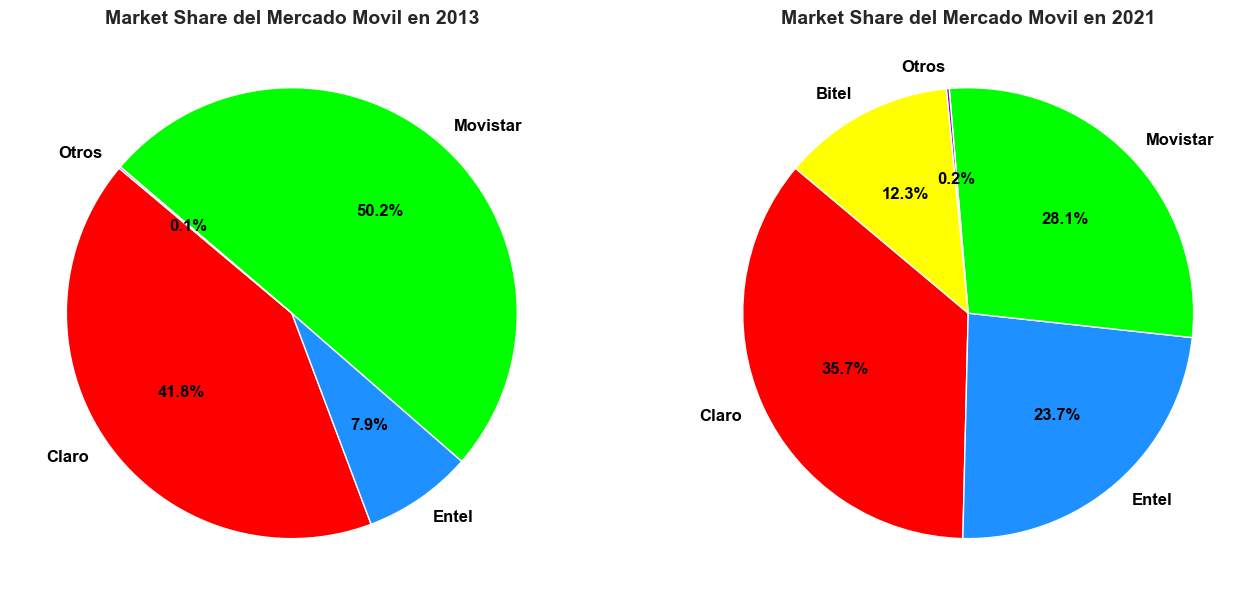

In [45]:
# Filtramos la data
df_2013a = df10[df10.index == 2013]
df_2021a = df10[df10.index == 2021]

companies = ['Claro', 'Entel', 'Movistar', 'Otros', 'Bitel']

# Extraemos los valores para el gráfico
values_2013a = df_2013a.loc[:, (companies, 'market_share')].values[0]
values_2021a = df_2021a.loc[:, (companies, 'market_share')].values[0]

# Filtramos bitel porque no tenía presencia en Perú en 2013
values_2013a_filtered = [val for val in values_2013a if val > 0]

# Nuevo array para las compañias que sí existen en 2013
companies_filtered = [comp for val, comp in zip(values_2013a, companies) if val > 0]

colors = ["red", "dodgerblue", "lime", "darkviolet", "yellow"]

# Creamos los subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Creamos el Pie para 2013 filtrado
ax1.pie(values_2013a_filtered, labels=companies_filtered, colors=colors, autopct='%1.1f%%', startangle=140)
ax1.set_title("Market Share del Mercado Movil en 2013", fontsize=14, fontweight="bold")

# Creamos el Pie para 2021
ax2.pie(values_2021a, labels=companies, colors=colors, autopct='%1.1f%%', startangle=140)
ax2.set_title("Market Share del Mercado Movil en 2021", fontsize=14, fontweight="bold")

for ax in [ax1, ax2]:
    for text in ax.texts:
        text.set_fontweight('bold')
        text.set_color('black')
        text.set_size(12)

plt.show()


A raíz del impacto favorable que han tenido las compañías ingresantes al mercado, los porcentajes de 2013 se han redistribuido de manera que Claro y Movistar han perdido poder en el mercado, cediendo lugar a Entel y Bitel principalmente.

### 2. Utilizando el segundo dataset, cuál es la tasa de crecimiento del mercado de líneas móviles por todo tipo de contrato entre 2013-2021. 

In [46]:
#Delimitamos año y agrupamos variables de interés
df2_13_21 = df2[(df2["año"] >=2013) & (df2["año"] <= 2021)]
df2_13_21 = df2_13_21.groupby(["año", "tipo_de_plan"])["numero_de_lineas"].sum().reset_index() 
df2_13_21.head()

,año,tipo_de_plan,numero_de_lineas
0,2013,control,33178131
1,2013,postpago,59713714
2,2013,prepago,262720355
3,2014,control,42788525
4,2014,postpago,65422464


In [47]:
#Reorganizar tabla
df2_13_21=df2_13_21.pivot(index="año", columns=["tipo_de_plan"], values = "numero_de_lineas" )
df2_13_21.reset_index(inplace=True)
df2_13_21.head()

tipo_de_plan,año,control,postpago,prepago
0,2013,33178131,59713714,262720355
1,2014,42788525,65422464,260759044
2,2015,56802633,65591137,271572282
3,2016,71096545,66213860,296807067
4,2017,71459352,66533006,318031768


In [48]:
#Calcular tasa de crecimiento para cada tipo de plan por año
columns_plan = ['control', 'postpago', 'prepago']

for columna in columns_plan:
    df2_13_21[f"Tasa_Crecimiento_{columna}"] = df2_13_21[columna].pct_change() * 100

df2_13_21.head()

tipo_de_plan,año,control,postpago,prepago,Tasa_Crecimiento_control,Tasa_Crecimiento_postpago,Tasa_Crecimiento_prepago
0,2013,33178131,59713714,262720355,NaN,NaN,NaN
1,2014,42788525,65422464,260759044,28.966050,9.560199,-0.746539
2,2015,56802633,65591137,271572282,32.752024,0.257821,4.146831
3,2016,71096545,66213860,296807067,25.164172,0.949401,9.292106
4,2017,71459352,66533006,318031768,0.510302,0.481993,7.151009


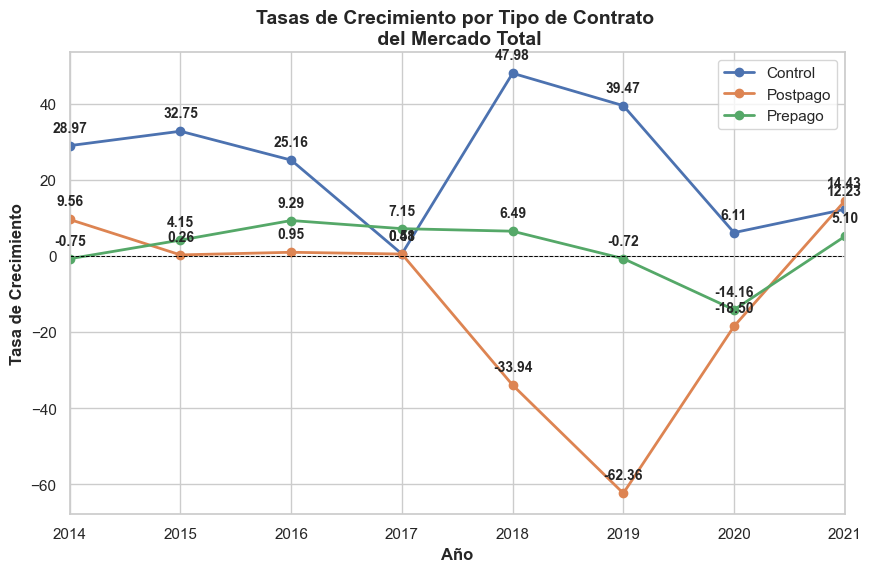

In [49]:
# Ancho de las líneas
ancho_linea = 2

# Crear el gráfico de líneas triple
plt.figure(figsize=(10, 6))

# Línea para la Tasa de Crecimiento Control
plt.plot(df2_13_21['año'], df2_13_21['Tasa_Crecimiento_control'], label='Control', linewidth=ancho_linea, marker = "o")

# Línea para la Tasa de Crecimiento Postpago
plt.plot(df2_13_21['año'], df2_13_21['Tasa_Crecimiento_postpago'], label='Postpago', linewidth=ancho_linea, marker = "o")

# Línea para la Tasa de Crecimiento Prepago
plt.plot(df2_13_21['año'], df2_13_21['Tasa_Crecimiento_prepago'], label='Prepago', linewidth=ancho_linea, marker = "o")

# Etiquetas de los ejes
plt.xlabel('Año',fontsize = 12, fontweight= "bold")
plt.ylabel('Tasa de Crecimiento',fontsize = 12, fontweight= "bold")

plt.xlim(min(df2_13_21['año'][1:]), max(df2_13_21['año']))
plt.axhline(0, color='black', linewidth=0.7, linestyle='--')
# Título del gráfico
plt.title("Tasas de Crecimiento por Tipo de Contrato \n del Mercado Total", fontsize = 14, fontweight= "bold")

# Leyenda
plt.legend()

for i, value in enumerate(df2_13_21['Tasa_Crecimiento_control']):
    plt.annotate(f'{value:.2f}', (df2_13_21['año'][i], value), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=10, fontweight="bold")

for i, value in enumerate(df2_13_21['Tasa_Crecimiento_postpago']):
    plt.annotate(f'{value:.2f}', (df2_13_21['año'][i], value), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=10, fontweight="bold")

for i, value in enumerate(df2_13_21['Tasa_Crecimiento_prepago']):
    plt.annotate(f'{value:.2f}', (df2_13_21['año'][i], value), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=10, fontweight="bold")

# Mostrar el gráfico
plt.grid(True)
plt.show()

En cuestión al plan control se ha visto una mejor respuesta por parte del consumidor a diferencia de el plan prepago y postago. Este último en especial, ha caído progresivamente desde 2017 hasta 2019. Cabe añadir que pese a ello, en 2021 logra superar al plan control. Mientras que la tasa de crecimiento del plan prepago, no ha tenido oscilaciones importantes. 

### 3. ¿Cuál es el porcentaje de líneas activas por empresa en 2021? Compararlo con el 2013.

In [50]:
#Creo nuevo dataframe con el año 2013 y las columnas seleccionadas
df2_2013 = df2[df2["año"] == 2013]
df2_2013 = df2_2013[["año", "compania", "numero_de_lineas"]]

In [51]:
#Sumo las lineas activas por cada empresa
lineas_total_2013= df2_2013.groupby ("compania")["numero_de_lineas"].sum()
suma_total_2013 = lineas_total_2013.sum ()

#Calculo porcentaje para cada cifra
porcentaje_2013 = (lineas_total_2013 / suma_total_2013) *100
porcentaje_2013= round(porcentaje_2013,2)

In [52]:
#Organizo resultados obtenidos
df2_2013["Lineas total"] = df2_2013["compania"].map(lineas_total_2013)
df2_2013["Porcentaje"] = df2_2013["compania"].map(porcentaje_2013)
df2_2013 = df2_2013[["año",'compania', "Lineas total", "Porcentaje"]].drop_duplicates()
df2_2013.reset_index(drop=True)

,año,compania,Lineas total,Porcentaje
0,2013,Claro,144001220,40.49
1,2013,Entel,19123734,5.38
2,2013,Movistar,192487246,54.13


In [53]:
#Creo nuevo dataframe con el año 2021 y las columnas seleccionadas
df2_2021=df2[df2["año"] == 2021]
df2_2021 = df2_2021 [["año", "compania", "numero_de_lineas"]]

In [54]:
#Sumo las lineas activas por cada empresa
lineas_total_2021= df2_2021.groupby ("compania")["numero_de_lineas"].sum()
suma_total_2021 = lineas_total_2021.sum ()

#Calculo porcentaje para cada cifra
porcentaje_2021 = (lineas_total_2021/ suma_total_2021)*100
porcentaje_2021= round(porcentaje_2021,2)

In [55]:
#Organizo resultados obtenidos
df2_2021["Lineas total"] = df2_2021["compania"].map(lineas_total_2021)
df2_2021["Porcentaje"] = df2_2021["compania"].map(porcentaje_2021)
df2_2021 = df2_2021[["año",'compania', "Lineas total", "Porcentaje"]].drop_duplicates()
df2_2021.reset_index(drop=True)

,año,compania,Lineas total,Porcentaje
0,2021,Bitel,91505338,18.51
1,2021,Claro,140179525,28.35
2,2021,Entel,106886526,21.62
3,2021,Movistar,153757069,31.10
4,2021,Others,2072552,0.42


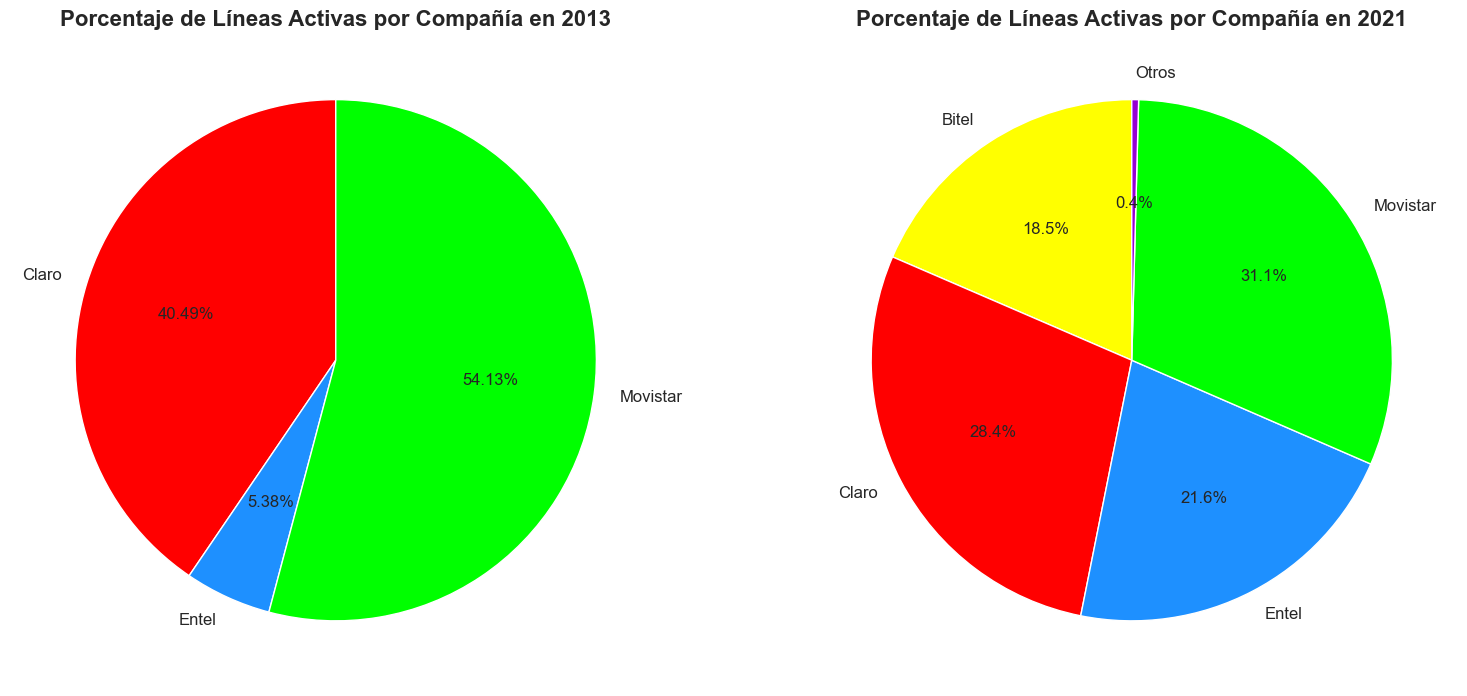

In [56]:

companies_2013 = ["Claro", "Entel", "Movistar"]
companies_2021 = ["Bitel","Claro","Entel","Movistar","Otros"]
values_2013 =  df2_2013["Porcentaje"]
values_2021 = df2_2021["Porcentaje"]

colors = {
    "Claro": "red",
    "Entel": "dodgerblue",
    "Movistar": "lime",
    "Otros": "darkviolet",
    "Bitel": "yellow",
}

#Creamos subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 7))

#Gráfico 2013
axs[0].pie(values_2013, labels=companies_2013, autopct="%1.2f%%", startangle=90, colors=[colors[company] for company in companies_2013], textprops={"fontsize": 12})
axs[0].set_title('Porcentaje de Líneas Activas por Compañía en 2013', fontsize=16, fontweight="bold")

#Gráfico 2021
axs[1].pie(values_2021, labels=companies_2021, autopct='%1.1f%%', startangle=90, colors=[colors[company] for company in companies_2021], textprops={"fontsize": 12})
axs[1].set_title('Porcentaje de Líneas Activas por Compañía en 2021', fontsize=16, fontweight="bold")

plt.tight_layout()
plt.show()


En 2013 Movistar ocupa el mayor porcentaje de preferencia por parte de los consumidores, seguido por Claro que toma el segundo lugar. Por otro lado, en 2021 se mantiene con el mayor porcentaje; sin embargo, a largo plazo se espera que este se vaya aminorando debido a la presencia de otras compañías. 

### 4. Si dividimos los ingresos por el número de líneas para cada empresa, tenemos el ingreso promedio por línea. ¿Qué conclusiones podemos sacar comparando el 2013 con el 2021 por cada empresa? 

In [57]:
#Agrupamos ingresos por año y compañía
df1a = df1.groupby(["año","compania", "linea_de_producto"])["ingresos_soles"].sum().reset_index()
df1a.head()

,año,compania,linea_de_producto,ingresos_soles
0,2013,Claro,cabletv,119579263
1,2013,Claro,data,129783150
2,2013,Claro,equipos,602707188
3,2013,Claro,interconexion,451196666
4,2013,Claro,internet,171809964


In [58]:
#Agrupamos número de líneas por año y compañía
df2a = df2.groupby(["año","compania"])["numero_de_lineas"].sum().reset_index()
df2a.head()

,año,compania,numero_de_lineas
0,2013,Claro,144001220
1,2013,Entel,19123734
2,2013,Movistar,192487246
3,2014,Bitel,771370
4,2014,Claro,146187130


In [59]:
#Juntamos bases
dft = pd.merge(df1a,df2a, on = ["año", "compania"], how = "right")
dft.head()

,año,compania,linea_de_producto,ingresos_soles,numero_de_lineas
0,2013,Claro,cabletv,119579263.0,144001220
1,2013,Claro,data,129783150.0,144001220
2,2013,Claro,equipos,602707188.0,144001220
3,2013,Claro,interconexion,451196666.0,144001220
4,2013,Claro,internet,171809964.0,144001220


In [60]:
#Creamos el ingreso promedio por línea
dft["ingreso_pr_por_linea"] = dft["ingresos_soles"]/dft["numero_de_lineas"]
dft.head()

,año,compania,linea_de_producto,ingresos_soles,numero_de_lineas,ingreso_pr_por_linea
0,2013,Claro,cabletv,119579263.0,144001220,0.830405
1,2013,Claro,data,129783150.0,144001220,0.901264
2,2013,Claro,equipos,602707188.0,144001220,4.185431
3,2013,Claro,interconexion,451196666.0,144001220,3.133284
4,2013,Claro,internet,171809964.0,144001220,1.193115


In [61]:
#Filtramos la base para los años de interés
years_to_keep = [2013, 2021]

dft_f = dft[dft["año"].isin(years_to_keep)].reset_index(drop=True)
dft_f = dft[dft["linea_de_producto"]=="movil"].reset_index(drop=True)
dft_f.head()

,año,compania,linea_de_producto,ingresos_soles,numero_de_lineas,ingreso_pr_por_linea
0,2013,Claro,movil,3.231866e+09,144001220,22.443320
1,2013,Entel,movil,6.082003e+08,19123734,31.803428
2,2013,Movistar,movil,3.876234e+09,192487246,20.137615
3,2014,Bitel,movil,1.469991e+07,771370,19.056886
4,2014,Claro,movil,3.516893e+09,146187130,24.057475


In [62]:
#Reorganizamos la data
dft_f = dft_f.pivot(index = "año", columns = ["compania"], values = "ingreso_pr_por_linea")
dft_f = dft_f.fillna(0)
dft_f

compania,Bitel,Claro,Entel,Movistar
año,,,,
2013,0.000000,22.443320,31.803428,20.137615
2014,19.056886,24.057475,31.186299,21.298597
2015,15.602872,23.294929,30.553513,22.455420
2016,9.092202,21.840263,23.545647,20.207692
2017,8.736968,21.633226,21.067863,15.517137
2018,10.803771,18.144359,17.980525,13.933542
2019,10.520022,18.693204,16.916866,13.700174
2020,11.270709,20.781795,17.598462,16.278800
2021,11.622126,21.966795,19.068018,15.730458


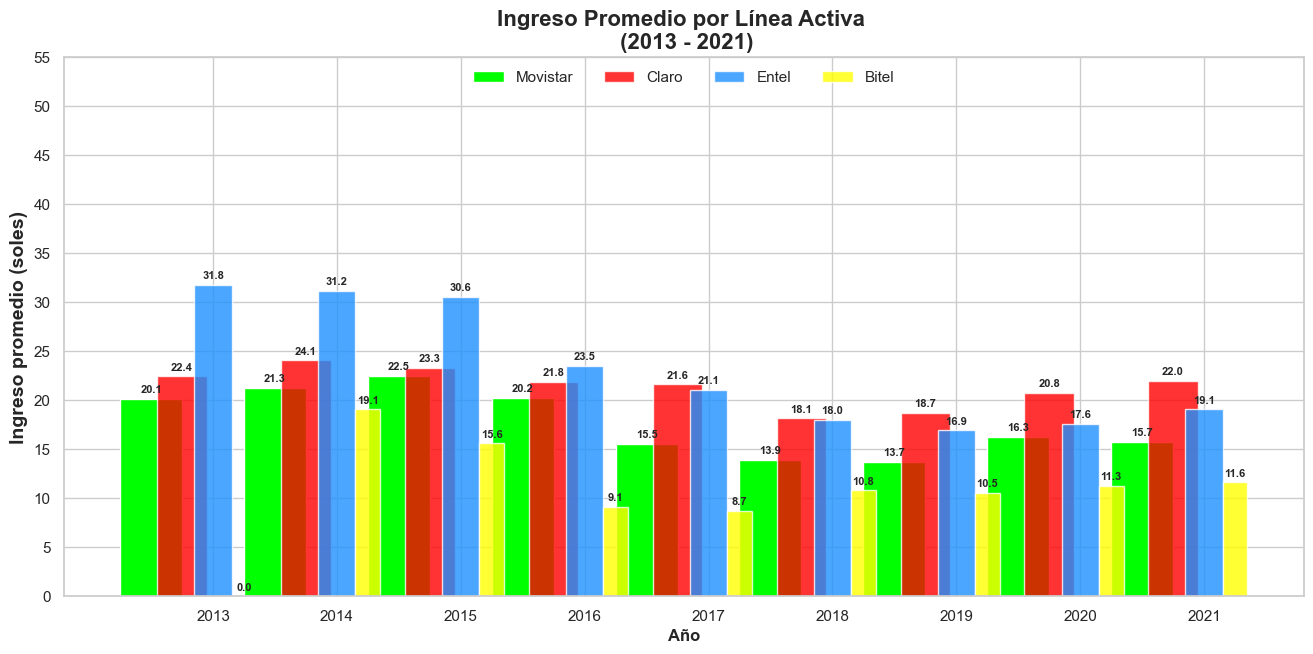

In [63]:
plt.figure(figsize=(16,7))
x=dft_f.index

y1=dft_f["Movistar"]
y2=dft_f["Claro"]
y3=dft_f["Entel"]
y4=dft_f["Bitel"]


#Grficamos las barras
bars1=plt.bar(x-0.5, y1, color="lime", width=0.5, label="Movistar")
bars2=plt.bar(x-0.25, y2, color="red", alpha=0.8, width=0.4, label="Claro")
bars3=plt.bar(x, y3, color="dodgerblue", alpha = 0.8, width=0.3, label="Entel")
bars4=plt.bar(x+0.25, y4, color="yellow", alpha=0.8, width=0.2, label="Bitel")



plt.title("Ingreso Promedio por Línea Activa \n (2013 - 2021)", fontsize=16, fontweight = "bold")
plt.ylabel("Ingreso promedio (soles)",  fontsize=14, fontweight = "bold")
yticks_a = [i for i in range(0,60,5)]

plt.yticks(yticks_a)
## Manipulando el eje X
plt.xlabel('Año', fontsize = 12, fontweight = "bold")
x_ticks_a = [i for i in range(2013,2022)]
plt.xticks(x_ticks_a)


for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.1f}', 
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  
                     textcoords="offset points",
                     ha='center', va='bottom',fontweight = "bold")
        

#plt.yticks(fontsize=8)
plt.legend(frameon=False, loc='upper center', ncol=5)

Para 2013, Movistar presenta el peor ingreso promedio por linea activa con 20.1 y cae a 15.7 en 2021. Mientras, el mejor ingreso promedio lo posee Entel con 31.8; en ese entonces, bitel y otras lineas no entraban en el panorma aún. Sin embargo, para 2021, Claro superó a Entel que cayó a 19.1. Claro ha sabido manejar los precios correctos para incrementar tanto su línea de números como el monto que cobra por cada una, asumentando así el ingreso promedio. Bitel ha atraído grandes cantidades de usuarios en los sectores fuera de la capital, siendo una de las líneas más elegidas a nivel rural. Y se puede esperar que a largo plazo el ingreso promedio de Bitel aumente significativamente.

### 5. ¿Cuál es el porcentaje de mercado de líneas por cada empresa por tipo de contrato? Esta pregunta se vería bien bien respondida con un subplot de 1 fila y tres columnas, utilizando `lineplot`. Cada línea es una empresa. Cada columna es un tipo de contrato.

In [64]:
#Agrupamos por compañía Claro con el tipo de plan y número de líneas
df2_20_cl = df2.groupby([ "año", "compania", "tipo_de_plan"])["numero_de_lineas"].sum().reset_index()
df2_20_cl = df2_20_cl[df2_20_cl["compania"]=="Claro"]

#Reorganizamos los datos de forma horizontal
df2_20_cl=df2_20_cl.pivot(index="año", columns=["compania", "tipo_de_plan"], values = "numero_de_lineas" )
df2_20_cl.reset_index(inplace=True)

#Calculamos la suma total mediante cada tipo de plan
df2_20_cl["Claro","total"] = df2_20_cl.sum(axis=1) - df2_20_cl["año"]
df2_20_cl.head()

compania       año   Claro                                
tipo_de_plan       control  postpago    prepago      total
0             2013  111802  37188789  106700629  144001220
1             2014   77663  44348836  101760631  146187130
2             2015   53962  47251244  100544690  147849896
3             2016   34320  50872239   95062874  145969433
4             2017   18368  51595415   96436821  148050604

In [65]:
#Calculamos del porcentaje por tipo de contrato
plan = ["control","postpago","prepago"]
for z in plan:
    df2_20_cl["Claro",f"{z}_por"] = df2_20_cl["Claro",f"{z}"]/df2_20_cl["Claro","total"]*100

df2_20_cl.head()

compania       año   Claro                                              \
tipo_de_plan       control  postpago    prepago      total control_por   
0             2013  111802  37188789  106700629  144001220    0.077640   
1             2014   77663  44348836  101760631  146187130    0.053126   
2             2015   53962  47251244  100544690  147849896    0.036498   
3             2016   34320  50872239   95062874  145969433    0.023512   
4             2017   18368  51595415   96436821  148050604    0.012407   

compania                               
tipo_de_plan postpago_por prepago_por  
0               25.825329   74.097031  
1               30.337032   69.609843  
2               31.958929   68.004573  
3               34.851296   65.125192  
4               34.849851   65.137742

In [66]:
#Agrupamos por compañía Entel con el tipo de plan y número de líneas
df2_20_en = df2.groupby([ "año", "compania", "tipo_de_plan"])["numero_de_lineas"].sum().reset_index()
df2_20_en = df2_20_en[df2_20_en["compania"]=="Entel"]

#Reorganizamos los datos de forma horizontal
df2_20_en=df2_20_en.pivot(index="año", columns=["compania", "tipo_de_plan"], values = "numero_de_lineas" )
df2_20_en.reset_index(inplace=True)

#Calculamos la suma total mediante cada tipo de plan
df2_20_en["Entel","total"] = df2_20_en.sum(axis=1) - df2_20_en["año"]
df2_20_en.head()

compania       año     Entel                             
tipo_de_plan         control postpago   prepago     total
0             2013   8151166   862286  10110282  19123734
1             2014   8031592   711346   8658455  17401393
2             2015  12874793   792309  13352264  27019366
3             2016  18646699   531532  31752878  50931109
4             2017  24302846   637356  43058479  67998681

In [67]:
#Calculamos el porcentaje por tipo de contrato 
plan = ["control","postpago","prepago"]
for z in plan:
    df2_20_en["Entel",f"{z}_por"] = df2_20_en["Entel",f"{z}"]/df2_20_en["Entel","total"]*100

df2_20_en.head()

compania       año     Entel                                           \
tipo_de_plan         control postpago   prepago     total control_por   
0             2013   8151166   862286  10110282  19123734   42.623297   
1             2014   8031592   711346   8658455  17401393   46.154880   
2             2015  12874793   792309  13352264  27019366   47.650241   
3             2016  18646699   531532  31752878  50931109   36.611610   
4             2017  24302846   637356  43058479  67998681   35.740173   

compania                               
tipo_de_plan postpago_por prepago_por  
0                4.508983   52.867719  
1                4.087868   49.757252  
2                2.932375   49.417385  
3                1.043629   62.344761  
4                0.937306   63.322521

In [68]:
#Agrupamos por compañía Movistar con el tipo de plan y número de líneas
df2_20_mo = df2.groupby([ "año", "compania", "tipo_de_plan"])["numero_de_lineas"].sum().reset_index()
df2_20_mo = df2_20_mo[df2_20_mo["compania"]=="Movistar"]

#Reorganizamos los datos de forma horizontal
df2_20_mo=df2_20_mo.pivot(index="año", columns=["compania", "tipo_de_plan"], values = "numero_de_lineas" )
df2_20_mo.reset_index(inplace=True)

#Calculamos la suma total mediante cada tipo de plan
df2_20_mo["Movistar","total"] = df2_20_mo.sum(axis=1) - df2_20_mo["año"]
df2_20_mo.head()

compania       año  Movistar                                
tipo_de_plan         control  postpago    prepago      total
0             2013  24915163  21662639  145909444  192487246
1             2014  34340631  20360881  149908628  204610140
2             2015  42501778  17545895  150130434  210178107
3             2016  50189110  14809759  143228721  208227590
4             2017  42701338  14300091  129002275  186003704

In [69]:
#Calculamos el porcentaje por tipo de contrato
plan = ["control","postpago","prepago"]
for z in plan:
    df2_20_mo["Movistar",f"{z}_por"] = df2_20_mo["Movistar",f"{z}"]/df2_20_mo["Movistar","total"]*100

df2_20_mo.head()

compania       año  Movistar                                              \
tipo_de_plan         control  postpago    prepago      total control_por   
0             2013  24915163  21662639  145909444  192487246   12.943799   
1             2014  34340631  20360881  149908628  204610140   16.783445   
2             2015  42501778  17545895  150130434  210178107   20.221791   
3             2016  50189110  14809759  143228721  208227590   24.103007   
4             2017  42701338  14300091  129002275  186003704   22.957251   

compania                               
tipo_de_plan postpago_por prepago_por  
0               11.254065   75.802136  
1                9.951062   73.265493  
2                8.348108   71.430101  
3                7.112294   68.784699  
4                7.688068   69.354681

In [70]:
#Agrupamos por compañía Bitel con el tipo de plan y número de líneas
df2_20_bi = df2.groupby([ "año", "compania", "tipo_de_plan"])["numero_de_lineas"].sum().reset_index()
df2_20_bi = df2_20_bi[df2_20_bi["compania"]=="Bitel"]

#Creamos una fila para el año 2013 colocando 0 en el número de líneas
bi2013c = pd.DataFrame({'año': [2013], 'compania': ["Bitel"], "tipo_de_plan": ["control"], "numero_de_lineas": 0})
bi2013po = pd.DataFrame({'año': [2013], 'compania': ["Bitel"], "tipo_de_plan": ["postpago"], "numero_de_lineas": 0})
bi2013pr = pd.DataFrame({'año': [2013], 'compania': ["Bitel"], "tipo_de_plan": ["prepago"], "numero_de_lineas": 0})

df2_20_bi = pd.concat([bi2013c, bi2013po, bi2013pr, df2_20_bi], ignore_index=True)

#Reorganizamos los datos de forma horizontal
df2_20_bi=df2_20_bi.pivot(index="año", columns=["compania", "tipo_de_plan"], values = "numero_de_lineas" )
df2_20_bi.reset_index(inplace=True)

#Calculamos la suma total mediante cada tipo de plan
df2_20_bi["Bitel","total"] = df2_20_bi.sum(axis=1) - df2_20_bi["año"]
df2_20_bi.head()

compania       año    Bitel                             
tipo_de_plan        control postpago   prepago     total
0             2013        0        0         0         0
1             2014   338639     1401    431330    771370
2             2015  1372100     1689   7544894   8918683
3             2016  2226416      330  26592734  28819480
4             2017  4436800      144  48511053  52947997

In [71]:
#Calculamos el porcentaje por tipo de contrato
plan = ["control","postpago","prepago"]
for z in plan:
    df2_20_bi["Bitel",f"{z}_por"] = df2_20_bi["Bitel",f"{z}"]/df2_20_bi["Bitel","total"]*100
df2_20_bi = df2_20_bi.fillna(0)
df2_20_bi.head()

compania       año    Bitel                                           \
tipo_de_plan        control postpago   prepago     total control_por   
0             2013        0        0         0         0    0.000000   
1             2014   338639     1401    431330    771370   43.900981   
2             2015  1372100     1689   7544894   8918683   15.384558   
3             2016  2226416      330  26592734  28819480    7.725386   
4             2017  4436800      144  48511053  52947997    8.379543   

compania                               
tipo_de_plan postpago_por prepago_por  
0                0.000000    0.000000  
1                0.181625   55.917394  
2                0.018938   84.596504  
3                0.001145   92.273469  
4                0.000272   91.620185

In [72]:
#Agrupamos por compañía Others con el tipo de plan y número de líneas
df2_20_ot = df2.groupby([ "año", "compania", "tipo_de_plan"])["numero_de_lineas"].sum().reset_index()
df2_20_ot = df2_20_ot[df2_20_ot["compania"]=="Others"]

#Creamos una fila para el año 2013 colocando 0 en el número de líneas
ot2015c = pd.DataFrame({'año': [2015], 'compania': ["Others"], "tipo_de_plan": ["control"], "numero_de_lineas": 0})
ot2015po = pd.DataFrame({'año': [2015], 'compania': ["Others"], "tipo_de_plan": ["postpago"], "numero_de_lineas": 0})
ot2015pr = pd.DataFrame({'año': [2015], 'compania': ["Others"], "tipo_de_plan": ["prepago"], "numero_de_lineas": 0})

ot2014c = pd.DataFrame({'año': [2014], 'compania': ["Others"], "tipo_de_plan": ["control"], "numero_de_lineas": 0})
ot2014po = pd.DataFrame({'año': [2014], 'compania': ["Others"], "tipo_de_plan": ["postpago"], "numero_de_lineas": 0})
ot2014pr = pd.DataFrame({'año': [2014], 'compania': ["Others"], "tipo_de_plan": ["prepago"], "numero_de_lineas": 0})

ot2013c = pd.DataFrame({'año': [2013], 'compania': ["Others"], "tipo_de_plan": ["control"], "numero_de_lineas": 0})
ot2013po = pd.DataFrame({'año': [2013], 'compania': ["Others"], "tipo_de_plan": ["postpago"], "numero_de_lineas": 0})
ot2013pr = pd.DataFrame({'año': [2013], 'compania': ["Others"], "tipo_de_plan": ["prepago"], "numero_de_lineas": 0})

df2_20_ot = pd.concat([ot2015c, ot2015po, ot2015pr, df2_20_ot], ignore_index=True)
df2_20_ot = pd.concat([ot2014c, ot2014po, ot2014pr, df2_20_ot], ignore_index=True)
df2_20_ot = pd.concat([ot2013c, ot2013po, ot2013pr, df2_20_ot], ignore_index=True)
df2_20_ot.head()

,año,compania,tipo_de_plan,numero_de_lineas
0,2013,Others,control,0
1,2013,Others,postpago,0
2,2013,Others,prepago,0
3,2014,Others,control,0
4,2014,Others,postpago,0


In [73]:
#Reorganizamos los datos de forma horizontal
df2_20_ot=df2_20_ot.pivot(index="año", columns=["compania", "tipo_de_plan"], values = "numero_de_lineas" )
df2_20_ot.reset_index(inplace=True)

#Calulamos la suma total mediante cada tipo de plan
df2_20_ot["Others","total"] = df2_20_ot.sum(axis=1) - df2_20_ot["año"]

#Asignamos 0 a los NaN
df2_20_ot=df2_20_ot.fillna(0)
df2_20_ot.head()

compania       año  Others                               
tipo_de_plan       control postpago    prepago      total
0             2013     0.0      0.0        0.0        0.0
1             2014     0.0      0.0        0.0        0.0
2             2015     0.0      0.0        0.0        0.0
3             2016     0.0      0.0   169860.0   169860.0
4             2017     0.0      0.0  1023140.0  1023140.0

In [74]:
#Calculamos el porcentaje por tipo de contrato 
plan = ["control","postpago","prepago"]
for z in plan:
    df2_20_ot["Others",f"{z}_por"] = df2_20_ot["Others",f"{z}"]/df2_20_ot["Others","total"]*100
df2_20_ot = df2_20_ot.fillna(0)
df2_20_ot.head()

compania       año  Others                                             \
tipo_de_plan       control postpago    prepago      total control_por   
0             2013     0.0      0.0        0.0        0.0         0.0   
1             2014     0.0      0.0        0.0        0.0         0.0   
2             2015     0.0      0.0        0.0        0.0         0.0   
3             2016     0.0      0.0   169860.0   169860.0         0.0   
4             2017     0.0      0.0  1023140.0  1023140.0         0.0   

compania                               
tipo_de_plan postpago_por prepago_por  
0                     0.0         0.0  
1                     0.0         0.0  
2                     0.0         0.0  
3                     0.0       100.0  
4                     0.0       100.0

In [75]:
#Concatenamos los DataFrames elaborados 
df21 = pd.concat([df2_20_cl, df2_20_en], axis=1)
df21 = df21.loc[:, ~df21.columns.duplicated()]

df22 = pd.concat([df21, df2_20_mo], axis=1)
df22 = df22.loc[:, ~df22.columns.duplicated()]

df23 = pd.concat([df22, df2_20_bi], axis=1)
df23 = df23.loc[:, ~df23.columns.duplicated()]

df24 = pd.concat([df23, df2_20_ot], axis=1)
df24 = df24.loc[:, ~df24.columns.duplicated()]
df24.head()

compania       año   Claro                                              \
tipo_de_plan       control  postpago    prepago      total control_por   
0             2013  111802  37188789  106700629  144001220    0.077640   
1             2014   77663  44348836  101760631  146187130    0.053126   
2             2015   53962  47251244  100544690  147849896    0.036498   
3             2016   34320  50872239   95062874  145969433    0.023512   
4             2017   18368  51595415   96436821  148050604    0.012407   

compania                                  Entel           ...       Bitel  \
tipo_de_plan postpago_por prepago_por   control postpago  ... control_por   
0               25.825329   74.097031   8151166   862286  ...    0.000000   
1               30.337032   69.609843   8031592   711346  ...   43.900981   
2               31.958929   68.004573  12874793   792309  ...   15.384558   
3               34.851296   65.125192  18646699   531532  ...    7.725386   
4               34.849851   65.137742  24302846   637356  ...    8.379543   

compania                               Others                                 \
tipo_de_plan postpago_por prepago_por control postpago    prepago      total   
0                0.000000    0.000000     0.0      0.0        0.0        0.0   
1                0.181625   55.917394     0.0      0.0        0.0        0.0   
2                0.018938   84.596504     0.0      0.0        0.0        0.0   
3                0.001145   92.273469     0.0      0.0   169860.0   169860.0   
4                0.000272   91.620185     0.0      0.0  1023140.0  1023140.0   

compania                                           
tipo_de_plan control_por postpago_por prepago_por  
0                    0.0          0.0         0.0  
1                    0.0          0.0         0.0  
2                    0.0          0.0         0.0  
3                    0.0          0.0       100.0  
4                    0.0          0.0       100.0  

[5 rows x 36 columns]

In [76]:
#Suma total del mercado de líneas
mercado = 0
compañias = ["Claro","Entel","Movistar","Bitel","Others"]
for i in compañias:
    mercado +=df24[f"{i}","total"]
df24["Mercado","total"]= mercado
df24.head()

compania       año   Claro                                              \
tipo_de_plan       control  postpago    prepago      total control_por   
0             2013  111802  37188789  106700629  144001220    0.077640   
1             2014   77663  44348836  101760631  146187130    0.053126   
2             2015   53962  47251244  100544690  147849896    0.036498   
3             2016   34320  50872239   95062874  145969433    0.023512   
4             2017   18368  51595415   96436821  148050604    0.012407   

compania                                  Entel           ...        Bitel  \
tipo_de_plan postpago_por prepago_por   control postpago  ... postpago_por   
0               25.825329   74.097031   8151166   862286  ...     0.000000   
1               30.337032   69.609843   8031592   711346  ...     0.181625   
2               31.958929   68.004573  12874793   792309  ...     0.018938   
3               34.851296   65.125192  18646699   531532  ...     0.001145   
4               34.849851   65.137742  24302846   637356  ...     0.000272   

compania                  Others                                             \
tipo_de_plan prepago_por control postpago    prepago      total control_por   
0               0.000000     0.0      0.0        0.0        0.0         0.0   
1              55.917394     0.0      0.0        0.0        0.0         0.0   
2              84.596504     0.0      0.0        0.0        0.0         0.0   
3              92.273469     0.0      0.0   169860.0   169860.0         0.0   
4              91.620185     0.0      0.0  1023140.0  1023140.0         0.0   

compania                                   Mercado  
tipo_de_plan postpago_por prepago_por        total  
0                     0.0         0.0  355612200.0  
1                     0.0         0.0  368970033.0  
2                     0.0         0.0  393966052.0  
3                     0.0       100.0  434117472.0  
4                     0.0       100.0  456024126.0  

[5 rows x 37 columns]

In [77]:
#Calculo del porcentaje de la compañía en el mercado
company = ["Claro","Entel","Movistar","Bitel","Others"]
for x in company:
    df24[f"{x}","total_por"] = df24[f"{x}","total"]/df24["Mercado","total"]*100
df24.head()

compania       año   Claro                                              \
tipo_de_plan       control  postpago    prepago      total control_por   
0             2013  111802  37188789  106700629  144001220    0.077640   
1             2014   77663  44348836  101760631  146187130    0.053126   
2             2015   53962  47251244  100544690  147849896    0.036498   
3             2016   34320  50872239   95062874  145969433    0.023512   
4             2017   18368  51595415   96436821  148050604    0.012407   

compania                                  Entel           ...     Others  \
tipo_de_plan postpago_por prepago_por   control postpago  ...      total   
0               25.825329   74.097031   8151166   862286  ...        0.0   
1               30.337032   69.609843   8031592   711346  ...        0.0   
2               31.958929   68.004573  12874793   792309  ...        0.0   
3               34.851296   65.125192  18646699   531532  ...   169860.0   
4               34.849851   65.137742  24302846   637356  ...  1023140.0   

compania                                               Mercado      Claro  \
tipo_de_plan control_por postpago_por prepago_por        total  total_por   
0                    0.0          0.0         0.0  355612200.0  40.493892   
1                    0.0          0.0         0.0  368970033.0  39.620326   
2                    0.0          0.0         0.0  393966052.0  37.528588   
3                    0.0          0.0       100.0  434117472.0  33.624409   
4                    0.0          0.0       100.0  456024126.0  32.465520   

compania          Entel   Movistar      Bitel    Others  
tipo_de_plan  total_por  total_por  total_por total_por  
0              5.377693  54.128415   0.000000  0.000000  
1              4.716208  55.454406   0.209060  0.000000  
2              6.858298  53.349294   2.263820  0.000000  
3             11.732103  47.965724   6.638636  0.039128  
4             14.911203  40.788128  11.610789  0.224361  

[5 rows x 42 columns]

In [78]:
#Calculo del porcentaje de la compañía en el mercado
company = ["Claro","Entel","Movistar","Bitel","Others"]
plan = ["control","prepago","postpago"]
for z in plan:
    y = 0
    for x in company:
        y += df24[x,z]
    df24["Mercado",f"{z}_total"] = y 
df24.head()

compania       año   Claro                                              \
tipo_de_plan       control  postpago    prepago      total control_por   
0             2013  111802  37188789  106700629  144001220    0.077640   
1             2014   77663  44348836  101760631  146187130    0.053126   
2             2015   53962  47251244  100544690  147849896    0.036498   
3             2016   34320  50872239   95062874  145969433    0.023512   
4             2017   18368  51595415   96436821  148050604    0.012407   

compania                                  Entel           ...      Others  \
tipo_de_plan postpago_por prepago_por   control postpago  ... prepago_por   
0               25.825329   74.097031   8151166   862286  ...         0.0   
1               30.337032   69.609843   8031592   711346  ...         0.0   
2               31.958929   68.004573  12874793   792309  ...         0.0   
3               34.851296   65.125192  18646699   531532  ...       100.0   
4               34.849851   65.137742  24302846   637356  ...       100.0   

compania          Mercado      Claro      Entel   Movistar      Bitel  \
tipo_de_plan        total  total_por  total_por  total_por  total_por   
0             355612200.0  40.493892   5.377693  54.128415   0.000000   
1             368970033.0  39.620326   4.716208  55.454406   0.209060   
2             393966052.0  37.528588   6.858298  53.349294   2.263820   
3             434117472.0  33.624409  11.732103  47.965724   6.638636   
4             456024126.0  32.465520  14.911203  40.788128  11.610789   

compania        Others       Mercado                               
tipo_de_plan total_por control_total prepago_total postpago_total  
0             0.000000    33178131.0   262720355.0     59713714.0  
1             0.000000    42788525.0   260759044.0     65422464.0  
2             0.000000    56802633.0   271572282.0     65591137.0  
3             0.039128    71096545.0   296807067.0     66213860.0  
4             0.224361    71459352.0   318031768.0     66533006.0  

[5 rows x 45 columns]

In [79]:
#Porcentaje del tipo de plan por año
for z in plan:
    for x in company:
        df24[x,f"{z}_por_plan"] = df24[x,z]/df24["Mercado",f"{z}_total"]*100

df24.head()

compania       año   Claro                                              \
tipo_de_plan       control  postpago    prepago      total control_por   
0             2013  111802  37188789  106700629  144001220    0.077640   
1             2014   77663  44348836  101760631  146187130    0.053126   
2             2015   53962  47251244  100544690  147849896    0.036498   
3             2016   34320  50872239   95062874  145969433    0.023512   
4             2017   18368  51595415   96436821  148050604    0.012407   

compania                                  Entel           ...  \
tipo_de_plan postpago_por prepago_por   control postpago  ...   
0               25.825329   74.097031   8151166   862286  ...   
1               30.337032   69.609843   8031592   711346  ...   
2               31.958929   68.004573  12874793   792309  ...   
3               34.851296   65.125192  18646699   531532  ...   
4               34.849851   65.137742  24302846   637356  ...   

compania                Claro            Entel         Movistar  \
tipo_de_plan prepago_por_plan prepago_por_plan prepago_por_plan   
0                   40.613766         3.848306        55.537929   
1                   39.024775         3.320481        57.489330   
2                   37.023178         4.916652        55.281943   
3                   32.028508        10.698154        48.256506   
4                   30.323015        13.539050        40.562701   

compania                Bitel           Others             Claro  \
tipo_de_plan prepago_por_plan prepago_por_plan postpago_por_plan   
0                    0.000000         0.000000         62.278473   
1                    0.165413         0.000000         67.788391   
2                    2.778227         0.000000         72.039068   
3                    8.959603         0.057229         76.830197   
4                   15.253524         0.321710         77.548600   

compania                 Entel          Movistar             Bitel  \
tipo_de_plan postpago_por_plan postpago_por_plan postpago_por_plan   
0                     1.444033         36.277494          0.000000   
1                     1.087312         31.122156          0.002141   
2                     1.207951         26.750405          0.002575   
3                     0.802750         22.366554          0.000498   
4                     0.957955         21.493228          0.000216   

compania                Others  
tipo_de_plan postpago_por_plan  
0                          0.0  
1                          0.0  
2                          0.0  
3                          0.0  
4                          0.0  

[5 rows x 60 columns]

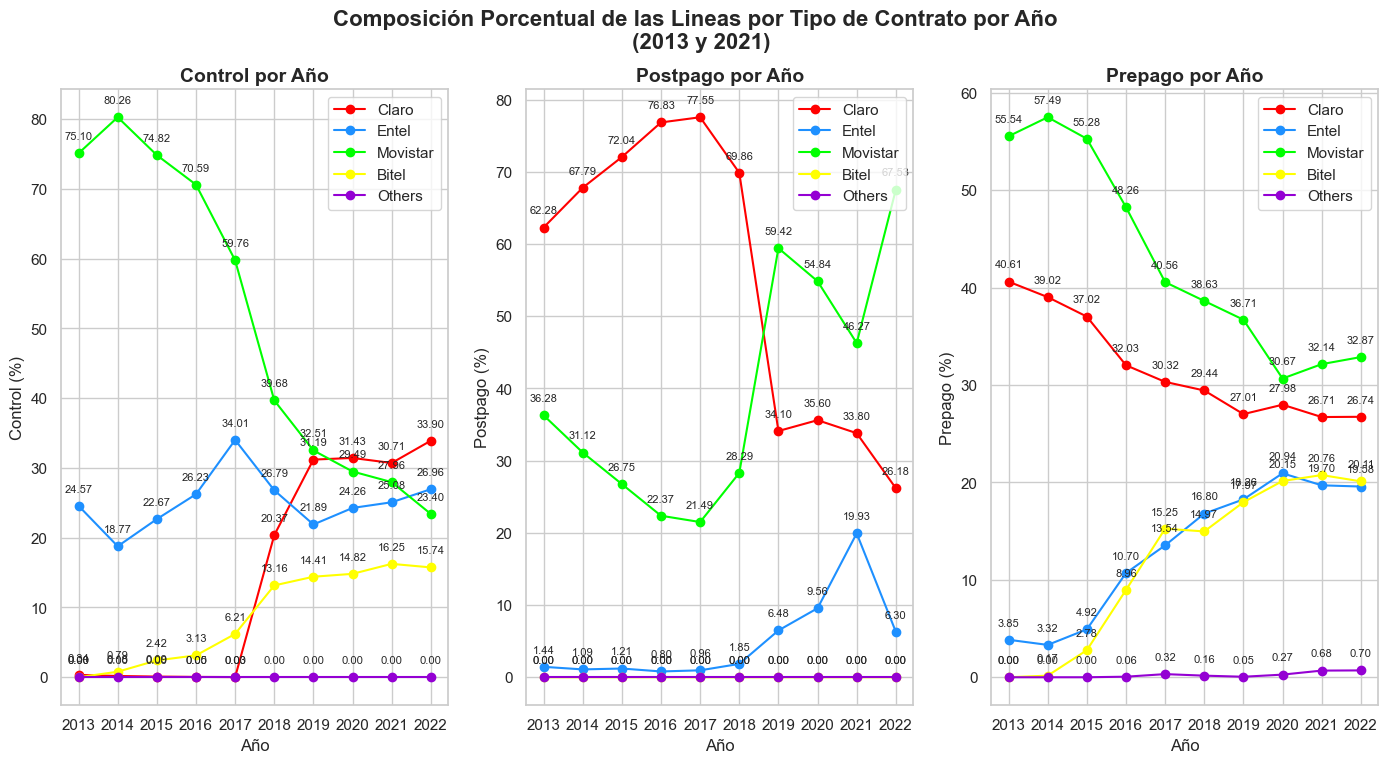

In [80]:
# Crear una figura y ejes para los gráficos
fig, ax = plt.subplots(1, 3, figsize=(17, 8))  # 1 fila y 3 columnas para 3 gráficos
colors = ["red", "dodgerblue", "lime","yellow","darkviolet" ]
# Graficar los datos desde el DataFrame en los ejes
df24.plot(x='año', y=[("Claro","control_por_plan"), ("Entel", "control_por_plan"), ("Movistar", "control_por_plan"),("Bitel", "control_por_plan"), ("Others", "control_por_plan")], ax=ax[0], color = colors, marker = "o")
df24.plot(x='año', y=[("Claro","postpago_por_plan"), ("Entel", "postpago_por_plan"), ("Movistar", "postpago_por_plan"),("Bitel", "postpago_por_plan"), ("Others", "postpago_por_plan")], ax=ax[1], color = colors, marker = "o")
df24.plot(x='año', y=[("Claro","prepago_por_plan"), ("Entel", "prepago_por_plan"), ("Movistar", "prepago_por_plan"),("Bitel", "prepago_por_plan"), ("Others", "prepago_por_plan")], ax=ax[2], color = colors, marker = "o")

x_ticks_b = [i for i in range(2013,2023)]
# Agregar etiquetas de ejes y títulos para cada gráfico
ax[0].set_xlabel('Año')
ax[0].set_ylabel('Control (%)')
ax[0].set_title('Control por Año', fontweight = "bold", fontsize = 14)
ax[0].set_xticks(x_ticks_b)

ax[1].set_xlabel('Año')
ax[1].set_ylabel('Postpago (%)')
ax[1].set_title('Postpago por Año', fontweight = "bold", fontsize = 14)
ax[1].set_xticks(x_ticks_b)

ax[2].set_xlabel('Año')
ax[2].set_ylabel('Prepago (%)')
ax[2].set_title('Prepago por Año', fontweight = "bold", fontsize = 14)
ax[2].set_xticks(x_ticks_b)

# Agregar una leyenda para distinguir las líneas en cada gráfico
ax[0].legend(['Claro', 'Entel', 'Movistar', 'Bitel', 'Others'])
ax[1].legend(['Claro', 'Entel', 'Movistar', 'Bitel', 'Others'])
ax[2].legend(['Claro', 'Entel', 'Movistar', 'Bitel', 'Others'])

for i in range(3):
    for line in ax[i].lines:
        x_data, y_data = line.get_data()
        for x, y in zip(x_data, y_data):
            ax[i].annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)

fig.suptitle("Composición Porcentual de las Lineas por Tipo de Contrato por Año \n (2013 y 2021)", fontsize=16, fontweight = "bold")
# Mostrar los gráficos
plt.show()

Este gráfico presenta el porcentaje de lineas activas que tiene cada empresa respecto al total del año correspondiente. Como se puede notar, desde 2017 Claro ha perdido posición en el mercado de postpago, dando cabida a una gran recuperación de Movistar en este mercado. Por su parte, Claro ha empezado a ganar gran posición en el mercado de Control desde 2016 superando ahora a Entel que se ha mantendio dentro del mismo rango en estos años. Movistar ha presentado una caída muy grande desde 2014, dando lugar a Claro en el mercado. Por otro lado, en el mercado de prepago, Claro y Movistar han ido perdiendo posición progresivamente, mientras Entel y Bitel han ido ganando rápidamente líneas en este mercado. Cabe resaltar que otras Compañías, solo han tenido una posición menor en el mercado de prepago.

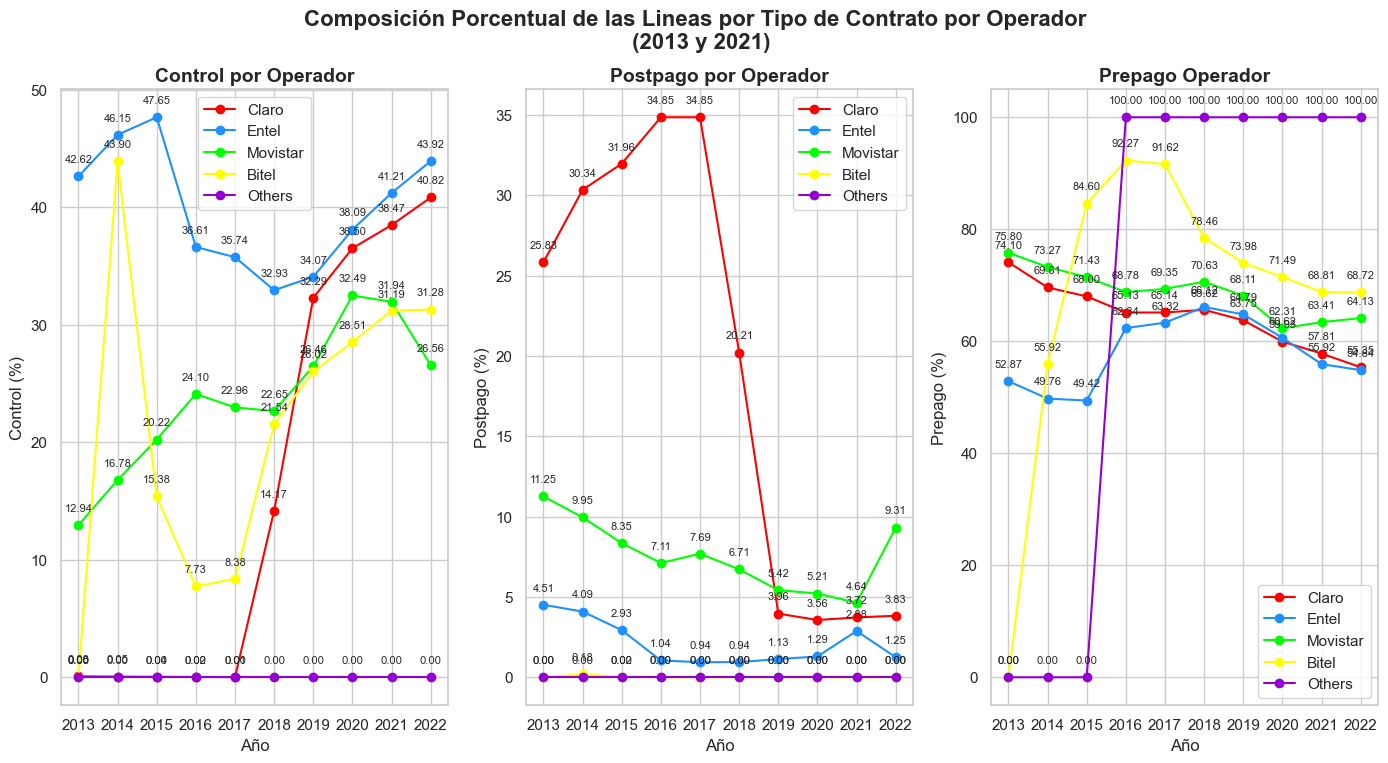

In [81]:
# Crear una figura y ejes para los gráficos
fig, ax = plt.subplots(1, 3, figsize=(17, 8))  # 1 fila y 3 columnas para 3 gráficos

# Graficar los datos desde el DataFrame en los ejes
df24.plot(x='año', y=[("Claro","control_por"), ("Entel", "control_por"), ("Movistar", "control_por"),("Bitel", "control_por"), ("Others", "control_por")], ax=ax[0], color = colors, marker = "o")
df24.plot(x='año', y=[("Claro","postpago_por"), ("Entel", "postpago_por"), ("Movistar", "postpago_por"),("Bitel", "postpago_por"), ("Others", "postpago_por")], ax=ax[1], color = colors, marker = "o")
df24.plot(x='año', y=[("Claro","prepago_por"), ("Entel", "prepago_por"), ("Movistar", "prepago_por"),("Bitel", "prepago_por"), ("Others", "prepago_por")], ax=ax[2], color = colors, marker = "o")

# Agregar etiquetas de ejes y títulos para cada gráfico

ax[0].set_xlabel('Año')
ax[0].set_ylabel('Control (%)')
ax[0].set_title('Control por Operador', fontweight = "bold", fontsize = 14)
ax[0].set_xticks(x_ticks_b)

ax[1].set_xlabel('Año')
ax[1].set_ylabel('Postpago (%)')
ax[1].set_title('Postpago por Operador', fontweight = "bold", fontsize = 14)
ax[1].set_xticks(x_ticks_b)


ax[2].set_xlabel('Año')
ax[2].set_ylabel('Prepago (%)')
ax[2].set_title('Prepago Operador', fontweight = "bold", fontsize = 14)
ax[2].set_xticks(x_ticks_b)


# Agregar una leyenda para distinguir las líneas en cada gráfico
ax[0].legend(['Claro', 'Entel', 'Movistar', 'Bitel', 'Others'])
ax[1].legend(['Claro', 'Entel', 'Movistar', 'Bitel', 'Others'])
ax[2].legend(['Claro', 'Entel', 'Movistar', 'Bitel', 'Others'])

for i in range(3):
    for line in ax[i].lines:
        x_data, y_data = line.get_data()
        for x, y in zip(x_data, y_data):
            ax[i].annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)

fig.suptitle("Composición Porcentual de las Lineas por Tipo de Contrato por Operador \n (2013 y 2021)", fontsize=16, fontweight = "bold")
# Mostrar los gráficos
plt.show()

En este análisis, vemos la composición por mercado de todas las líneas que poseen las empresas. Por ejemplo, para 2013, Claro tenía un 25.83% de sus líneas en Postpago, un 74.10 en Prepago y un 0.1 en Control. El gráfico nos da a entender que Claro, ha perdido líneas en Postpago, pero las ha ganado en Control desde 2016, mientras que en prepago, ha ido perdiendo líneas respecto al total lentamente. Entel por su parte, no tiene muchas líneas en Postpago y ha preferido centrarse en los mercados de Control y Prepago, teniendo ahí la mayor parte de sus líneas. Movistar ha ido ganando líneas en Control y perdiendo en postpago respecto al total. Complementando con el gráfico anterior, pese a que en 2022, Movistar cuenta con casi el 70% de las líneas en postpago del mercado, esas líneas solo representan el 9.31% de las líneas que tiene en todos los mercados. Bitel tuvo una gran porcentaje de sus líneas en control, pero ahora se ha enfocado notablemente en el mercado de prepago y cuenta ahora con una mayor parte de sus líneas en este mercado. Cabe destacar que para 2016 estuvo muy cerca de alcanzar el 95% de todas sus líneas en este sector. Finalmente, las otras firmas solo cuentan con prepago, así que el 100% de sus líneas se encuentran en este mercado.

## 3. Conclusiones del Análisis

### ¿Cuál es el principal negocio de Claro? ¿Cuál es su ventaja competitiva?

- El principal negocio de Claro por línea de producto es el servicio móvil. Ahora bien, dentro de sus tipos de plan en los servicios móviles, Claro destaca actualmente en control representando un 40% de las líneas que posee. Además, en cuestión a la ventaja competitiva, podemos enfatizar que Claro lidera la velocidad promedio de descarga 4G en las diversas ciudades que conforman las provincias.

### ¿Cuáles son los segmentos de productos que le convienen? 

- Los segmentos de productos que le convienen a Claro han demostrado una distribución relativamente semejante para todos los años —salvo por algunas líneas de producto en periodos específicos—. En ese sentido, tomando el 2021 como año de enfoque, en primer lugar se encuentran los servicios móviles que tuvieron un porcentaje de facturación de 49.4%. Seguido por la venta de equipos los cuales conforman un 27.5%, concluyendo con el servicio de internet que ocupa un 10.1% en la facturación. Por lo tanto, a Claro le conviene permanecer obteniendo el mayor porcentaje de facturación a través de los servicios móviles

### ¿Claro se ha defendido frente al ingreso de los competidores Bitel y Entel? ¿Lo hizo mejor que Movistar?¿Por qué podría ser esto?

- Para responder el presente enunciado nos podemos apoyar en los gráficos denotados por "Market Share del Mercado Móvil en 2013" y ""Market Share del Mercado Móvil en 2021". El primero, muestra que la participación de Claro en el mercado frente a las demás compañías fue de 41.8%. Mientras que el segundo, exhibe que el 35.7% del control o dominio en el mercado le corresponde a Claro. Por otro lado, Movistar pasó de tener un 50.2% de participación en 2013 a un 28.1% en 2021. Por lo tanto, a comparación de Movistar, Claro ha mantenido su presencia en el mercado logrando defender una posición considerable ante las nuevas compañías ingresantes. En concreto, podemos afirmar ello pues el dominio de Movistar se ha visto fuertemente aminorado por Entel y Bitel principalmente. Ello puede explicarse en que la cobertura de Claro presenta mejor desempeño y mantiene una constante respuesta a las demás compañías mediante el lanzamiento de nuevos planes y ofertas según Diario el Comercio y revista Forbes respectivamente.

### ¿Dónde debería enfocar Claro sus esfuerzos en un futuro? 

- En vista de que Claro posee una ventaja competitiva en la velocidad y desempeño de su cobertura, debe colocar sus esfuerzos en innovaciones que logren potenciar dichas ventajas y mostrar mayor acogida en el mercado. Ello, puede aprovecharse en diversos eventos o contextos que capturen la atención del consumidor. Para aterrizar esta noción, recientemente Claro apostó por implementar la inteligencia artificial en su nuevo spot publicitario como auspiciador oficial de nuestra selección peruana de fútbol. De forma que ya generó un vínculo no solo entre la publicidad y la inteligencia artificial sino también con los peruanos